<a href="https://colab.research.google.com/github/annefrancine/Action-and-Gesture-Recognition/blob/master/Project_1_jumping_jacks_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Import the package

In [0]:
import time
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import zipfile

cv2.__version__

'4.1.2'

# Step 2: Connecting the drive and accessing the files







In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pose_path = '/content/drive/My Drive/pose'


In [0]:
imagens_path = "/content/drive/My Drive/imagens"


## Step 3: Importing the drive module


In [0]:
sys.path.append('/content/drive/My Drive/modulos')

In [0]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/My Drive/modulos',
 '/content/drive/My Drive/modulos',
 '/content/drive/My Drive/modulos']

In [0]:
import extrator_CORPO

## Step 4: Accessing pre-trained neural network

In [0]:
arquivo_proto = '/content/drive/My Drive/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arquivo_pesos = '/content/drive/My Drive/pose/body/mpi/pose_iter_160000.caffemodel'

numero_pontos = 15
pares_pontos = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7], [1, 14],
                [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]

In [0]:
cor_pontoA, cor_pontoB, cor_linha = (14, 201, 255), (255, 0, 128), (192, 192, 192)
cor_txtponto, cor_txtinicial, cor_txtandamento = (10, 216, 245), (255, 0, 128), (192, 192, 192)

tamanho_fonte, tamanho_linha, tamanho_circulo, espessura = 0.8, 2, 8, 5
fonte = cv2.FONT_HERSHEY_SIMPLEX

In [0]:
valida_pernas_juntas, valida_pernas_afastadas = 0, 0
valida_bracos_abaixo, valida_bracos_acima = 0, 0

## Step 5 - Define the dimensions of the input image.**





In [0]:
entrada_largura = 256
entrada_altura = 256

## Step 6 - loading a  video**

In [0]:
video = "/content/drive/My Drive/imagens/body/videos/original_3.mp4"
captura = cv2.VideoCapture(video)
conectado, frame = captura.read()

In [0]:
conectado

True

## Step 7: Creating a variable to save the results







Documentation VideoWriter_fourcc: https://www.programcreek.com/python/example/89348/cv2.VideoWriter_fourcc

In [0]:
resultado = "./drive/My Drive/polichinelo.avi"
gravar_video = cv2.VideoWriter(resultado, cv2.VideoWriter_fourcc(*'XVID'), 10,
                               (frame.shape[1], frame.shape[0]))

In [0]:
frame.shape

(720, 1280, 3)

## Step 8: Read the model loaded in Step 3


In [0]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

## Step 9: Displaying the outputs


posicao inicial


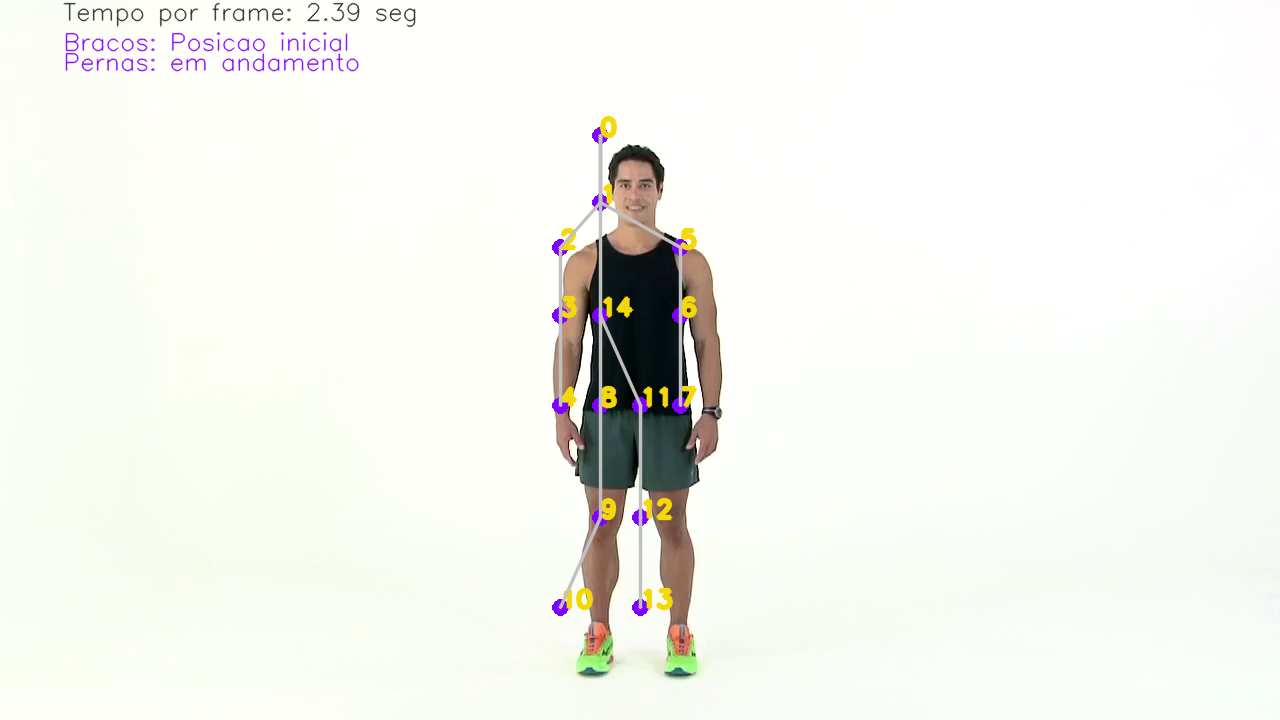

posicao inicial


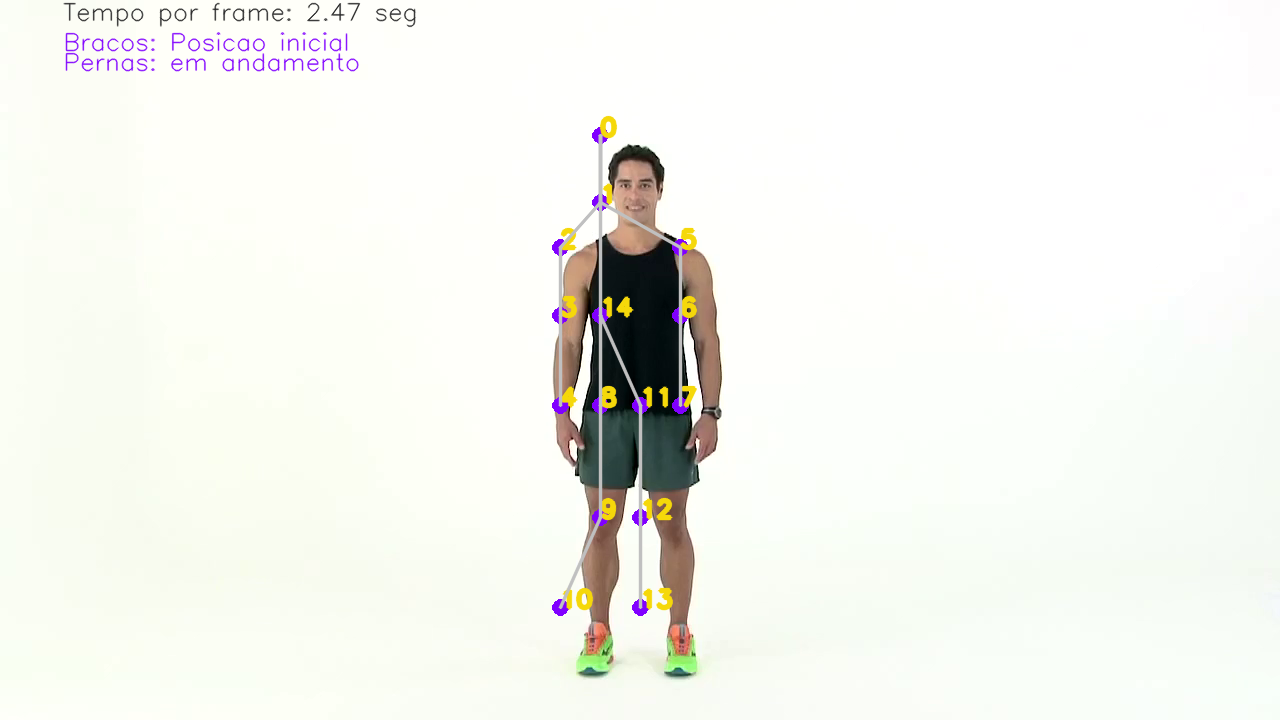

posicao inicial


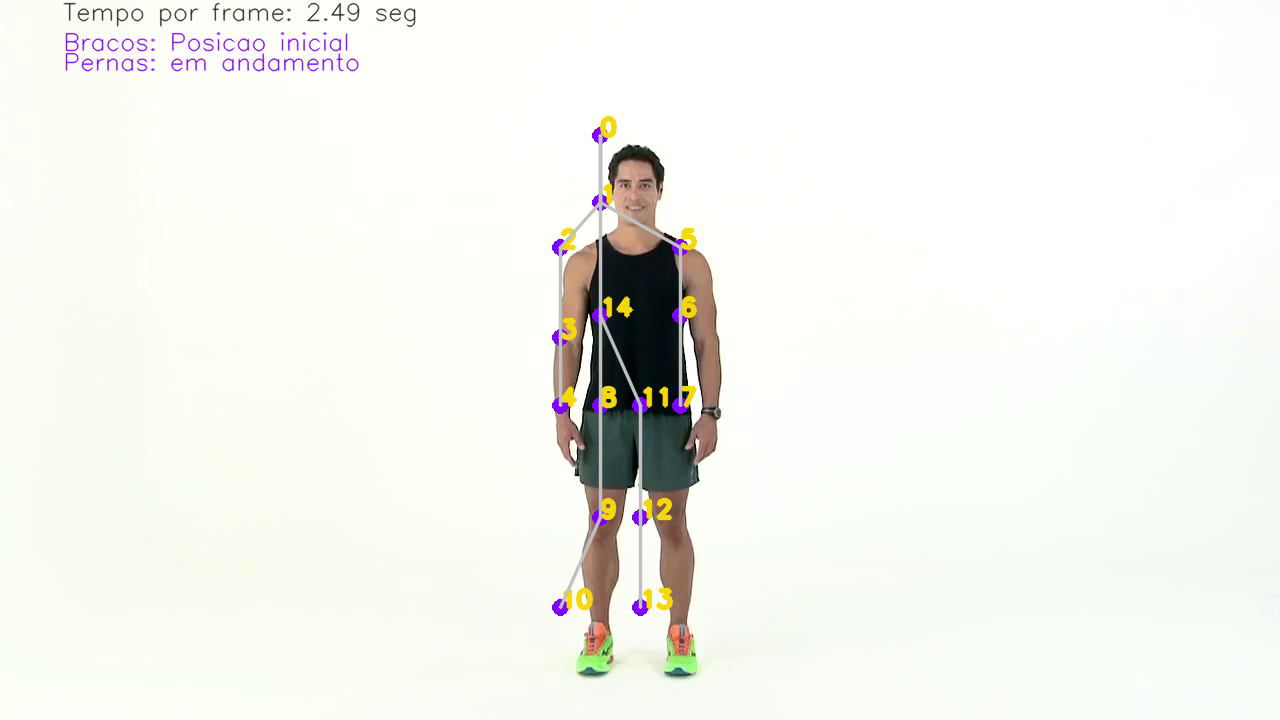

posicao inicial


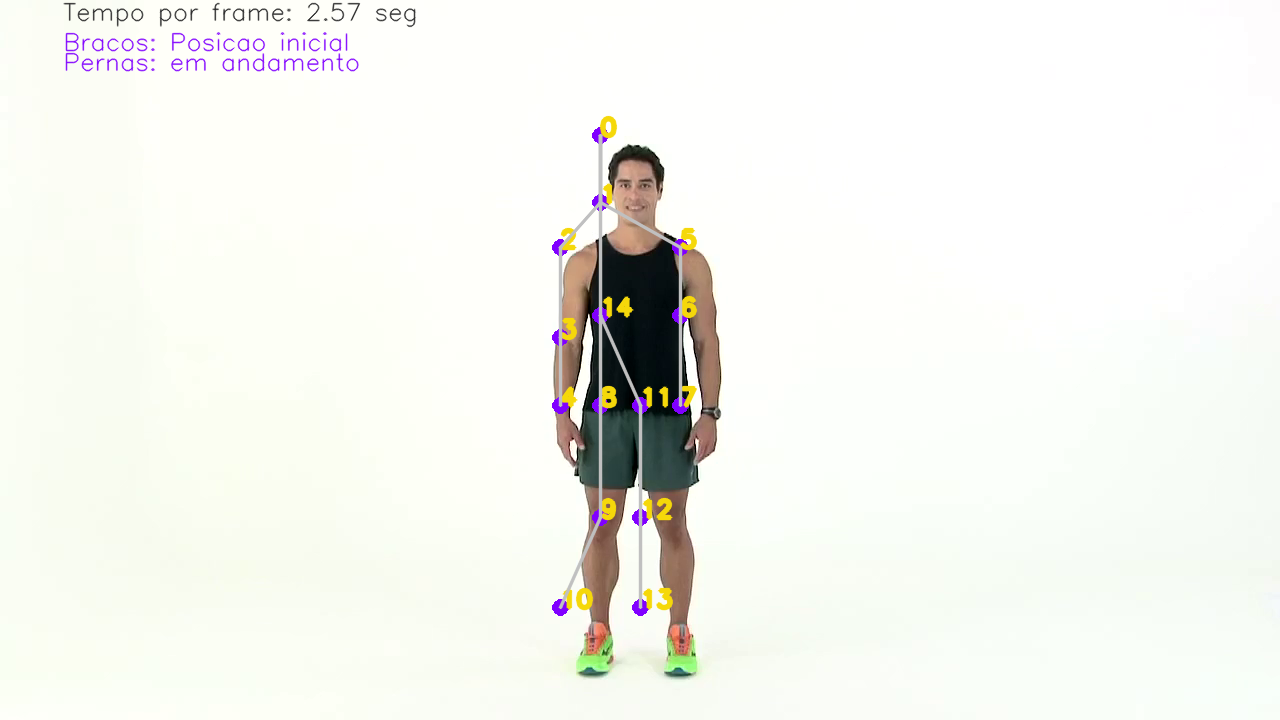

posicao inicial


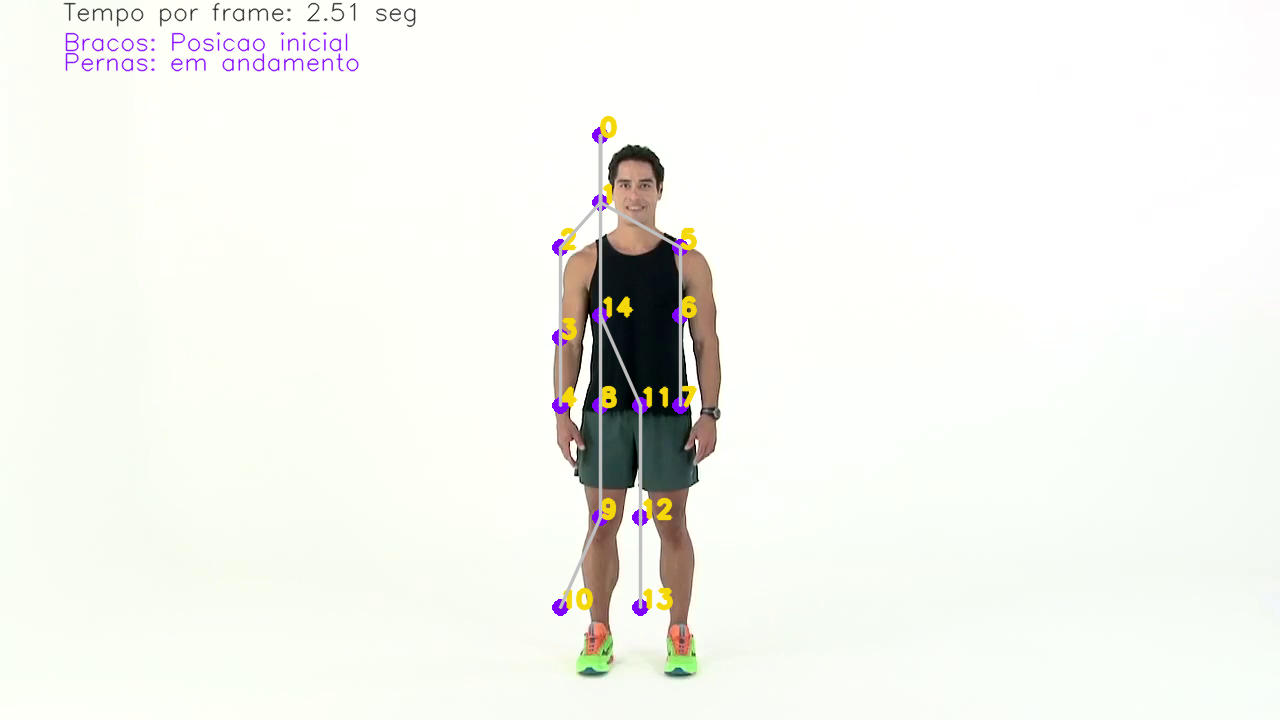

posicao inicial


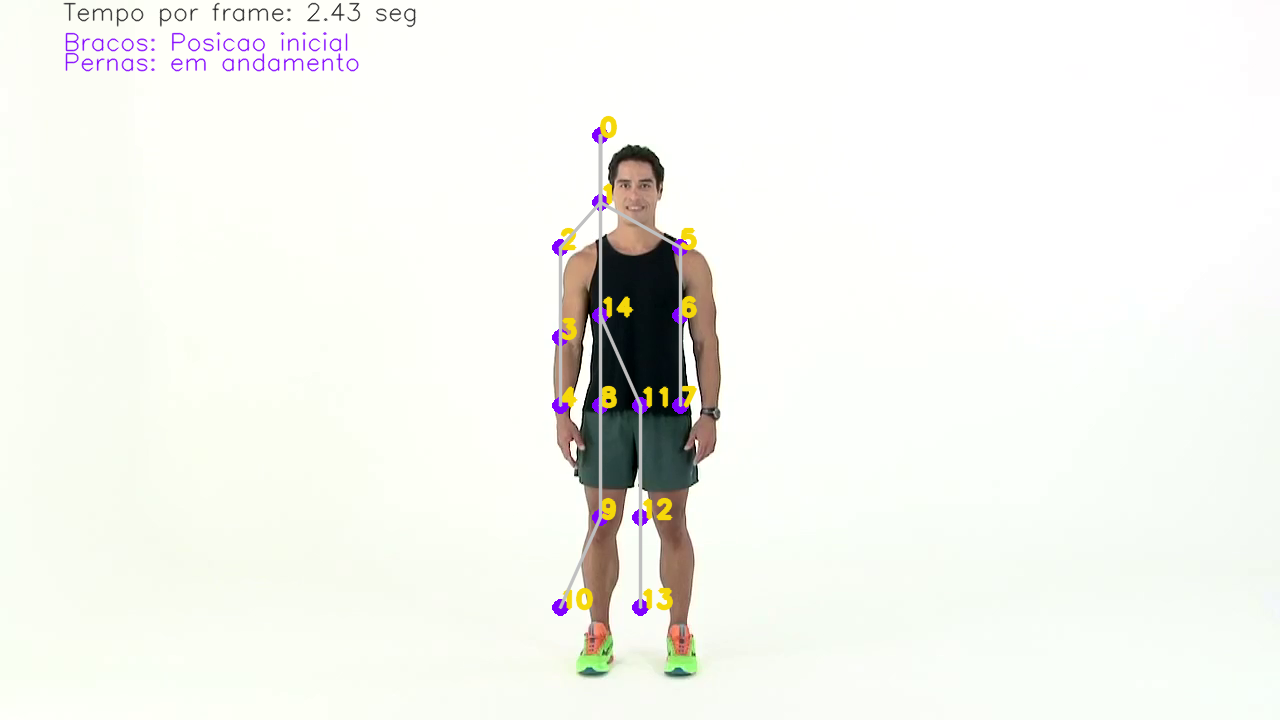

posicao inicial


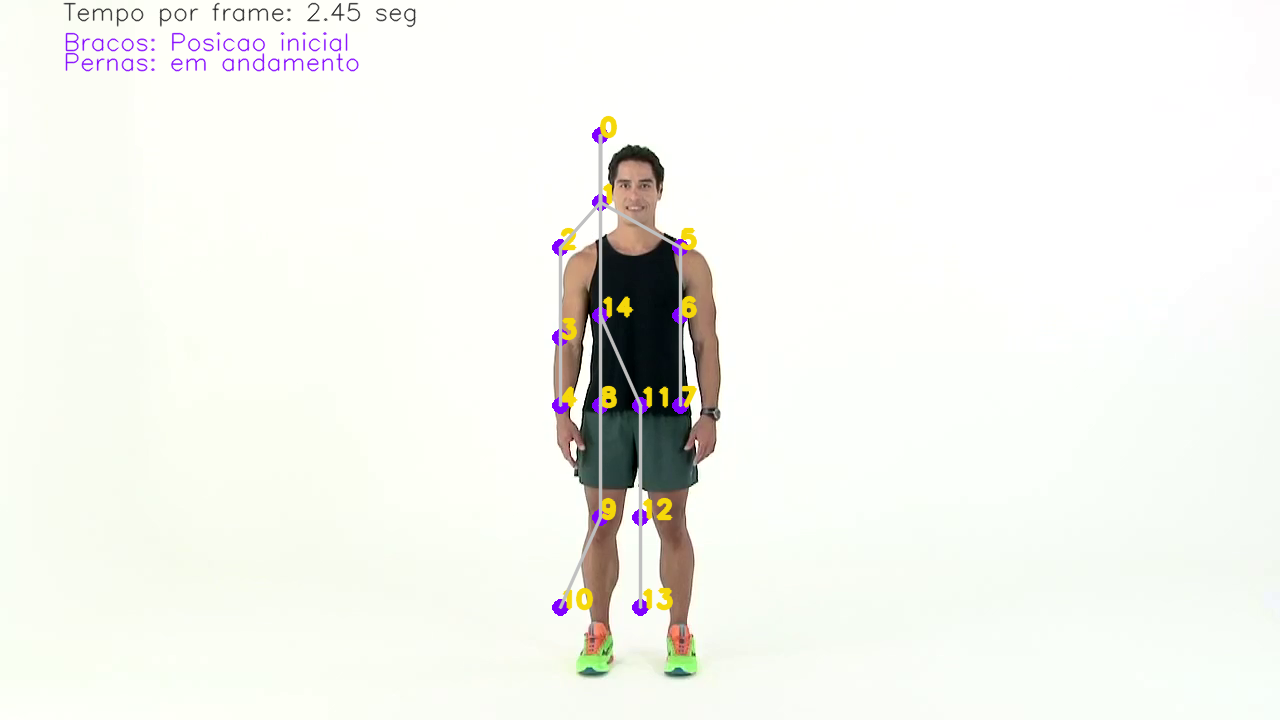

posicao inicial


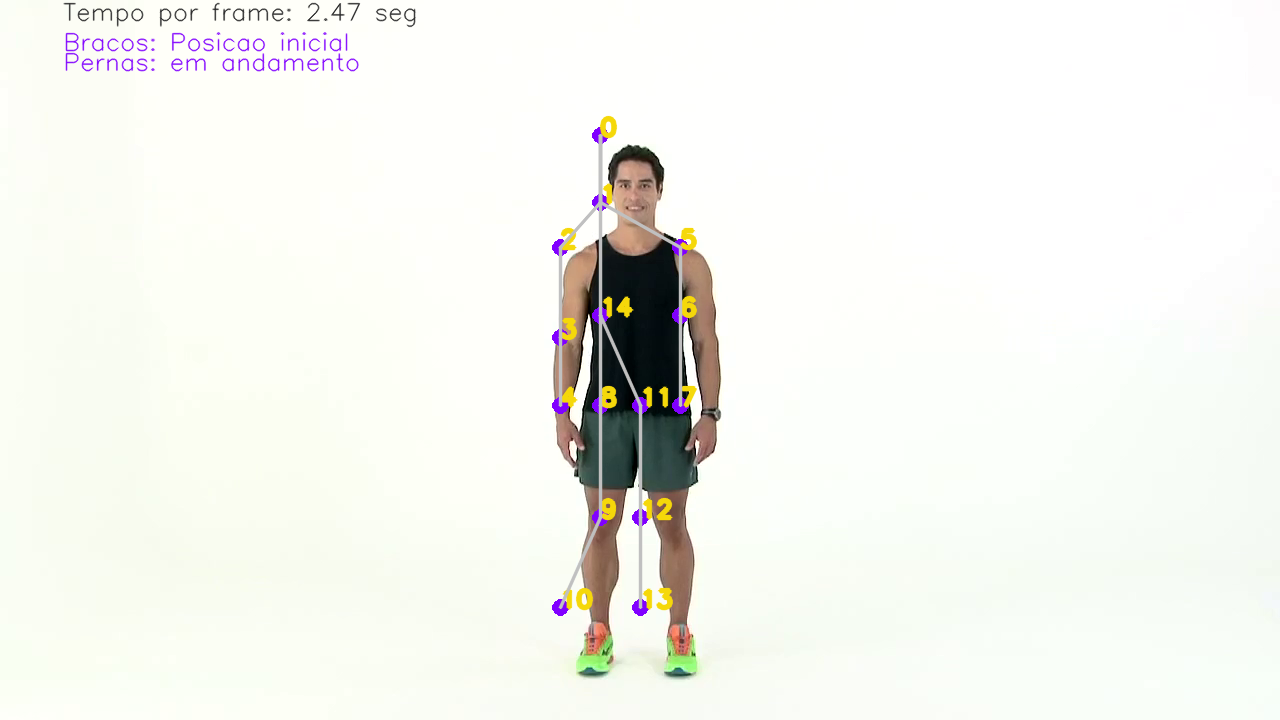

posicao inicial


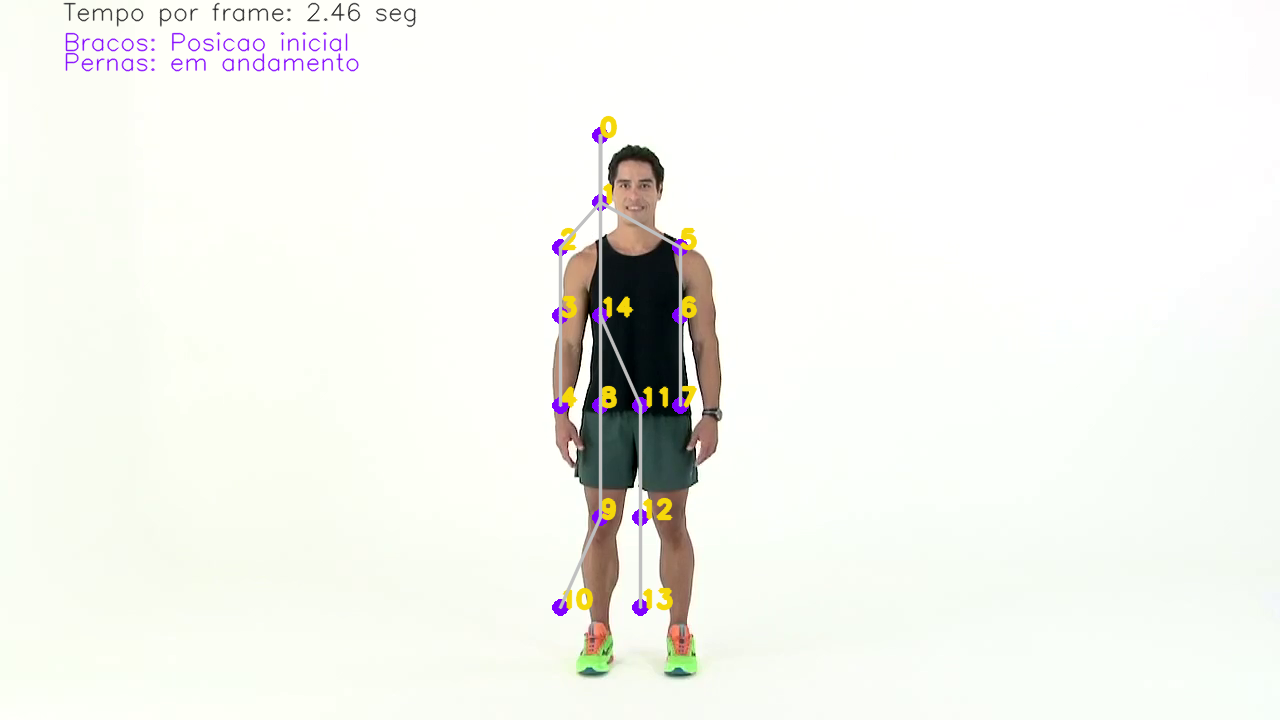

posicao inicial


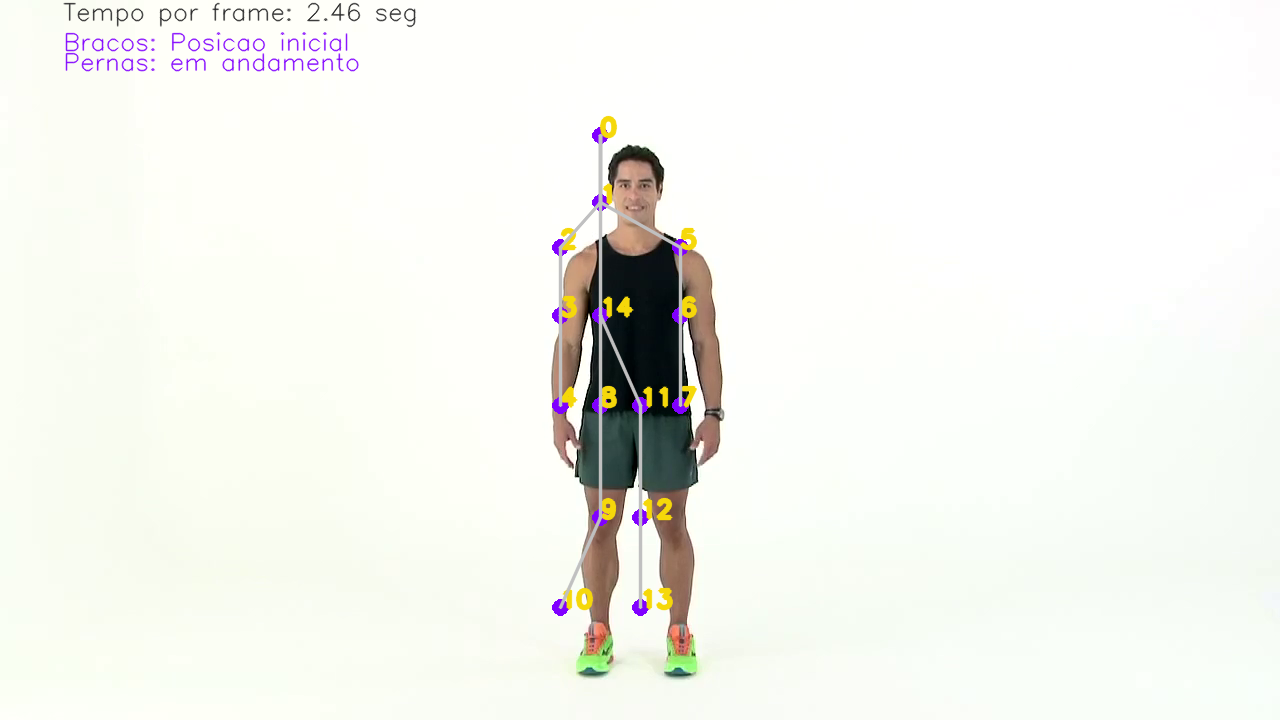

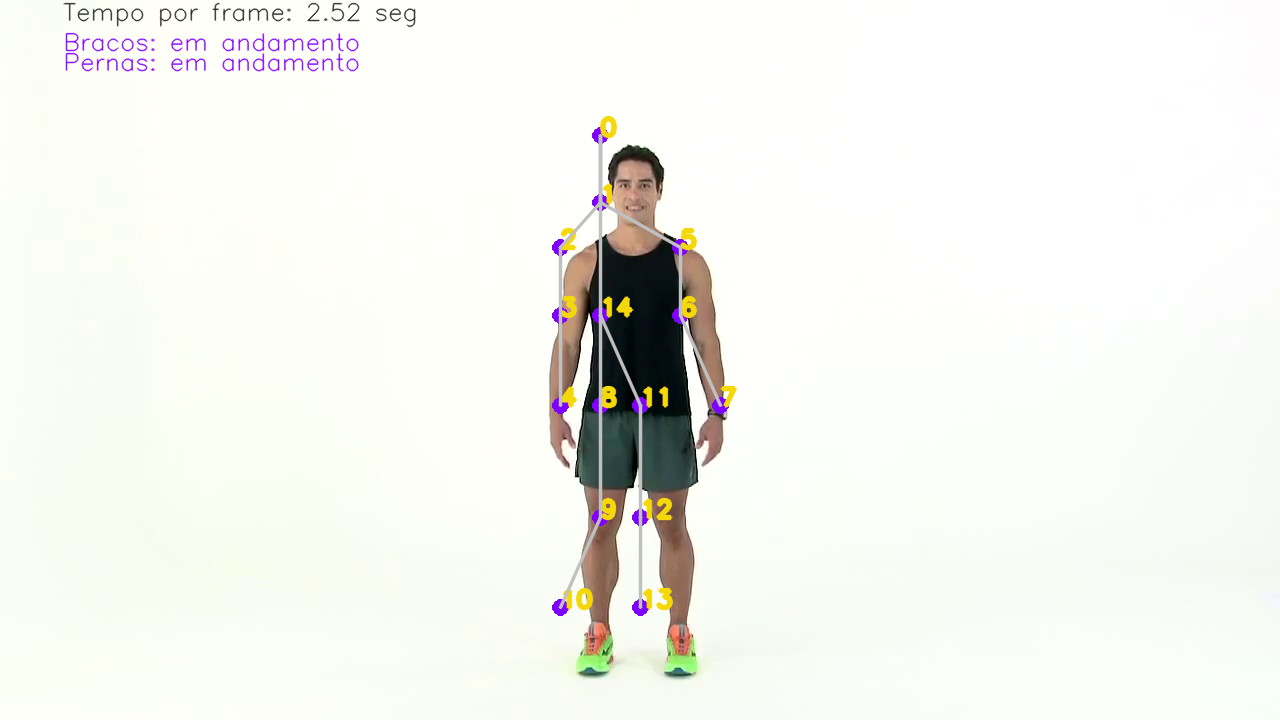

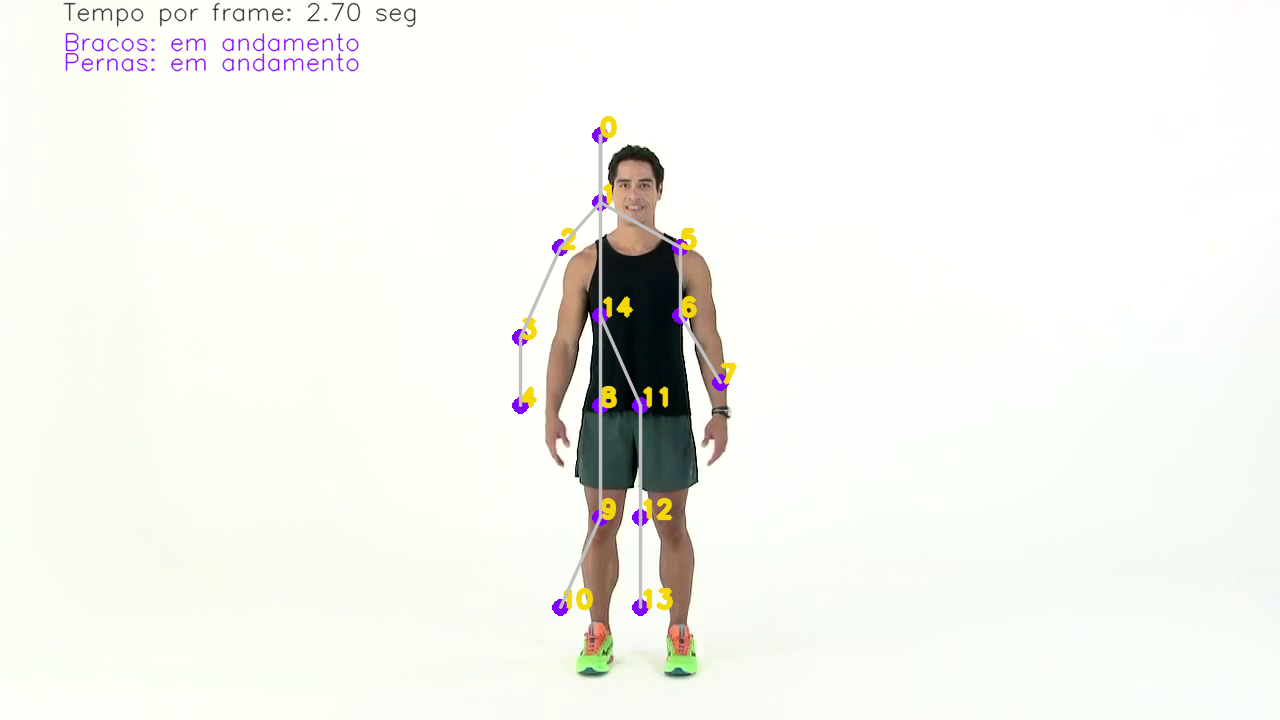

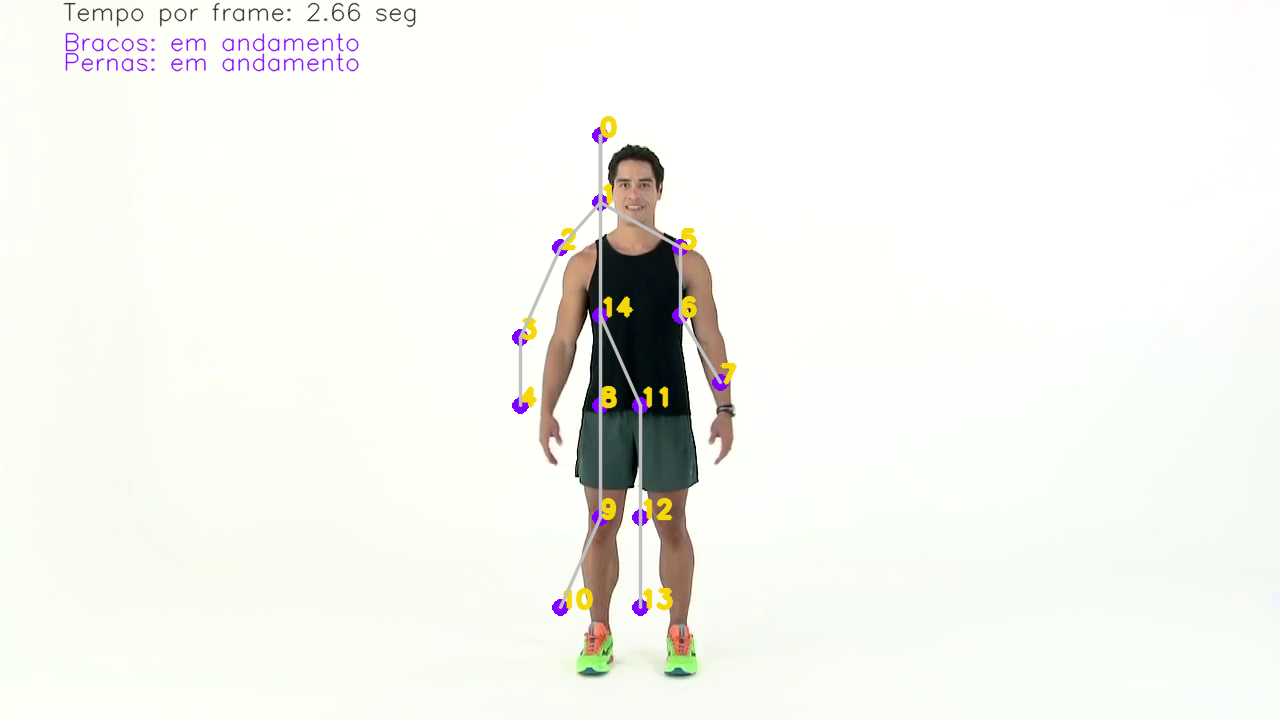

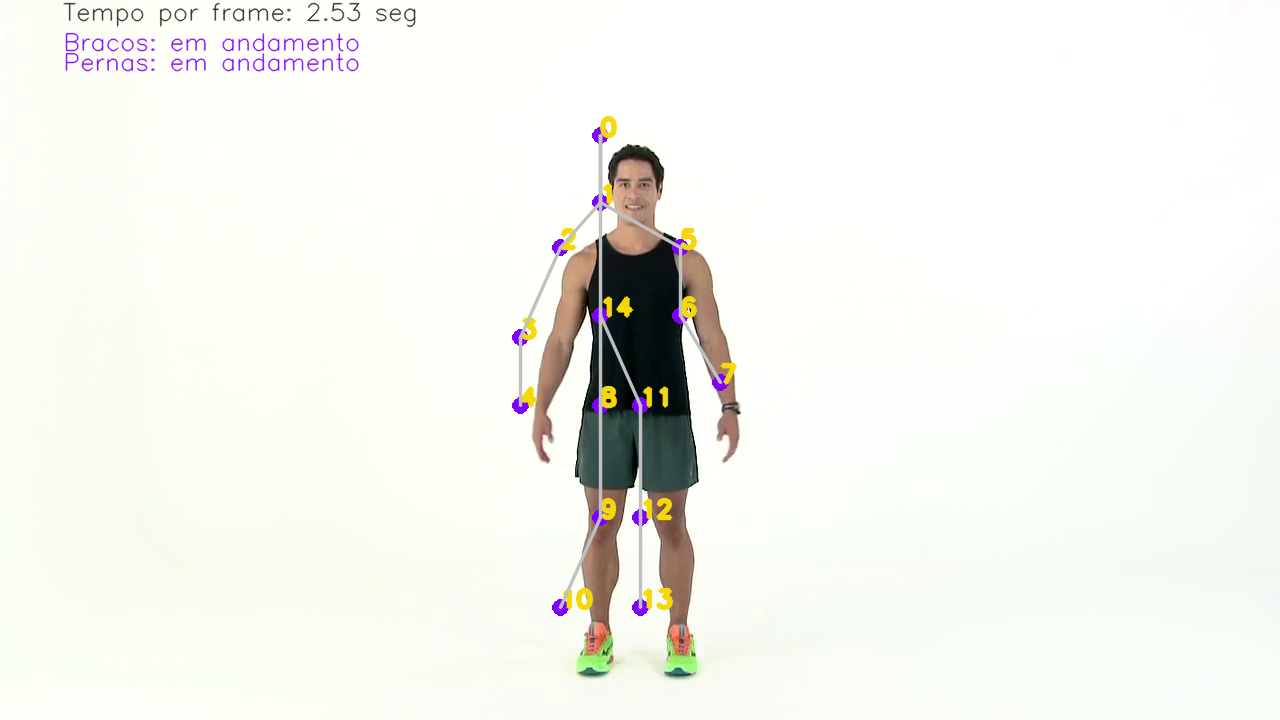

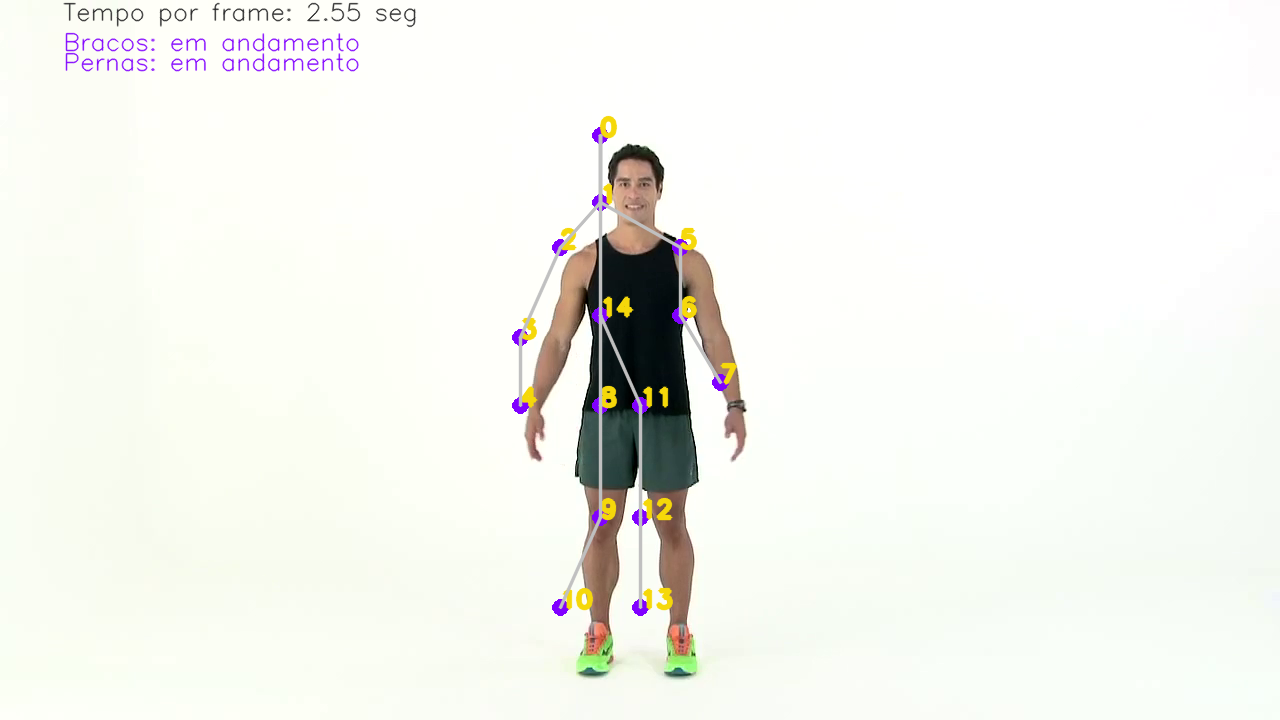

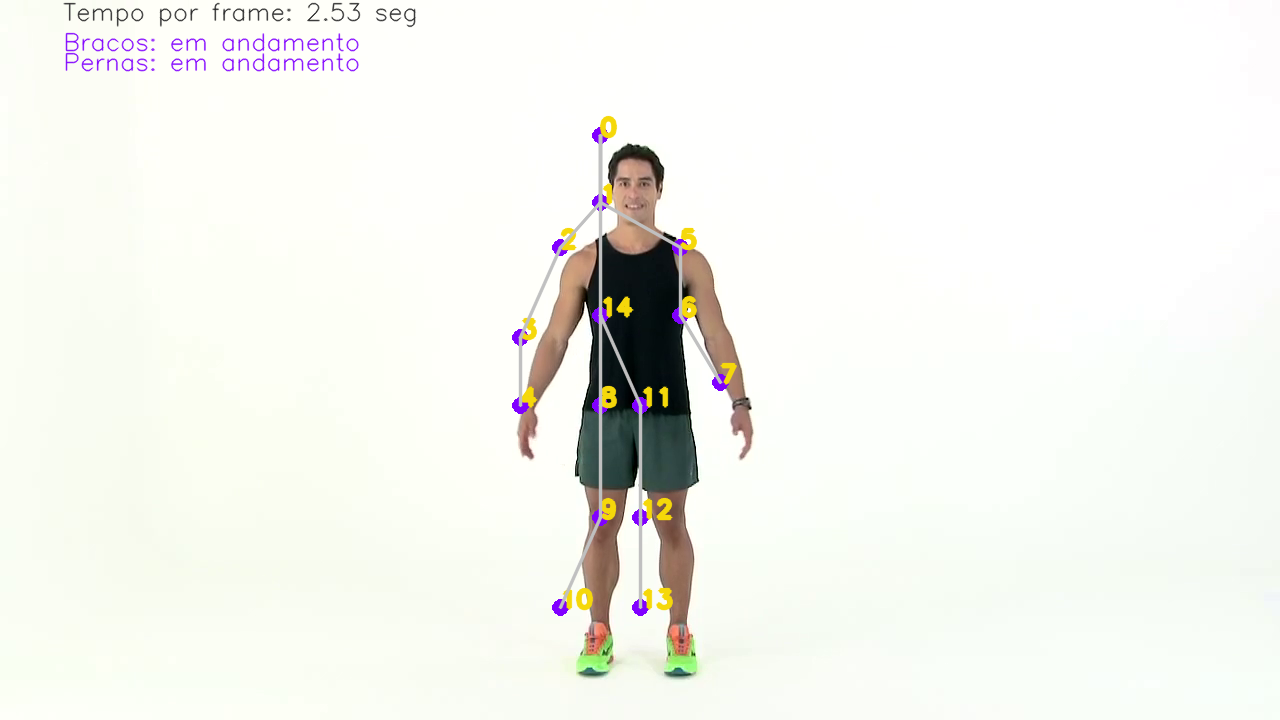

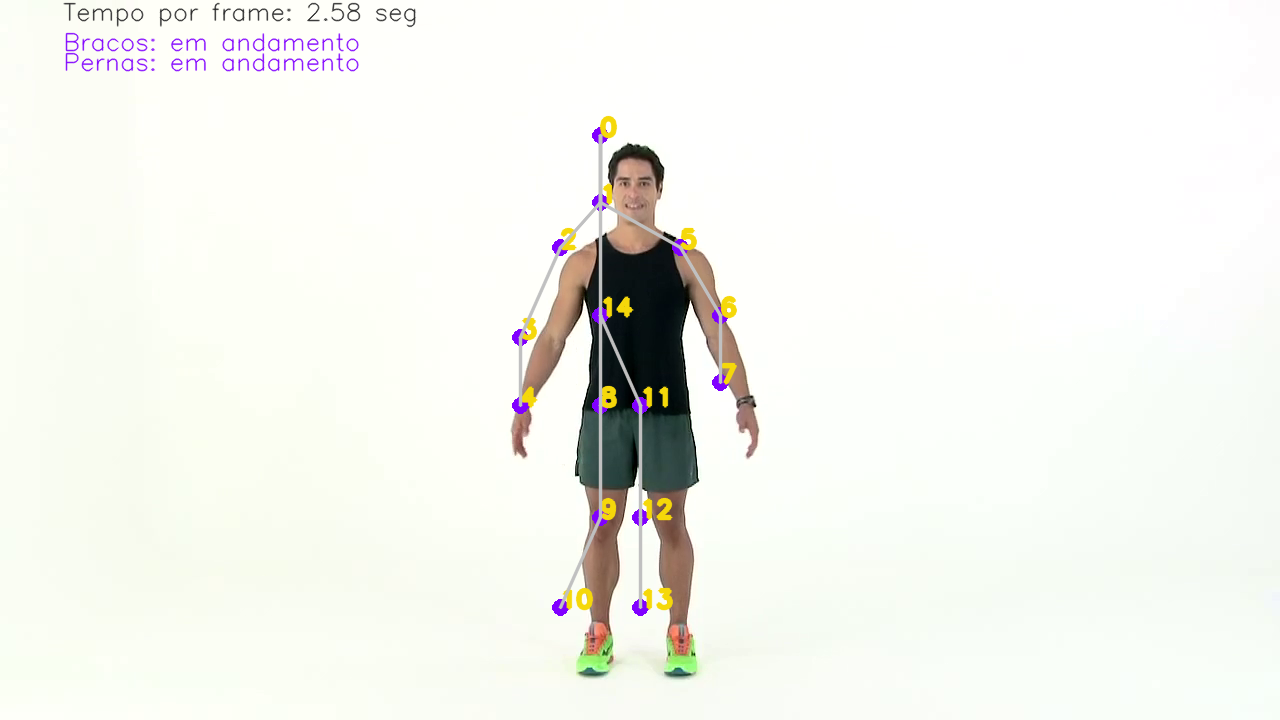

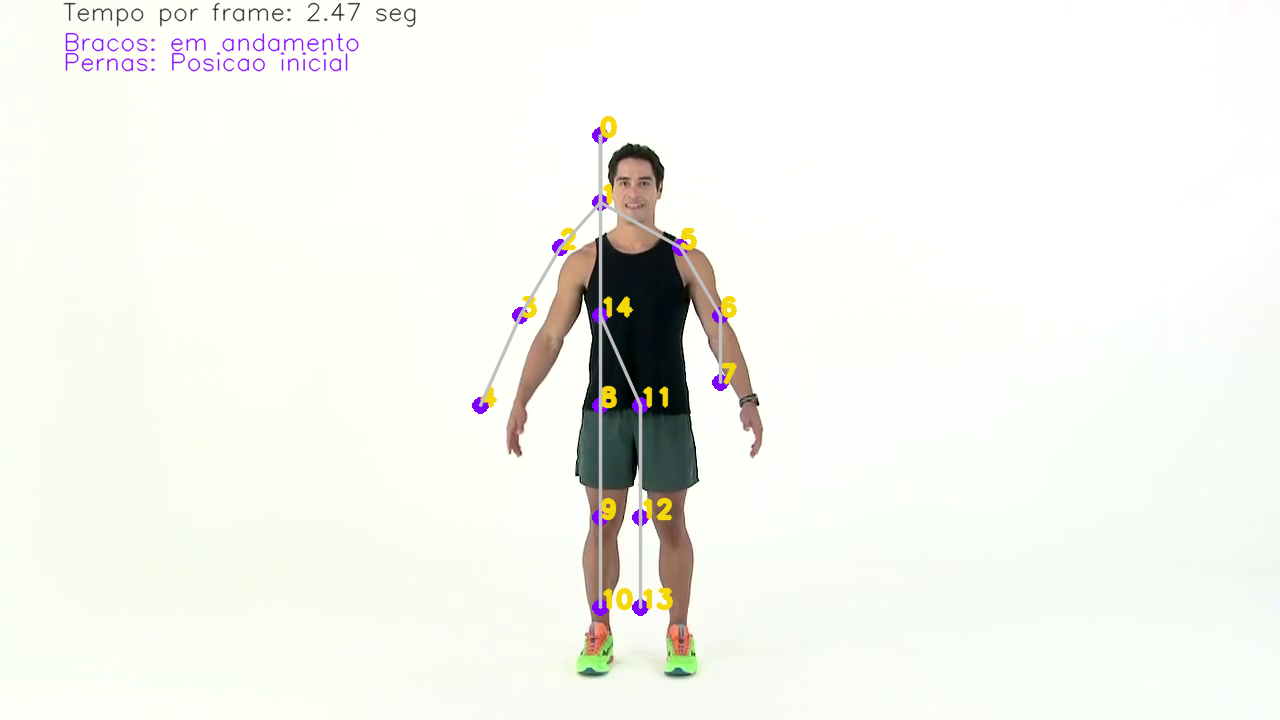

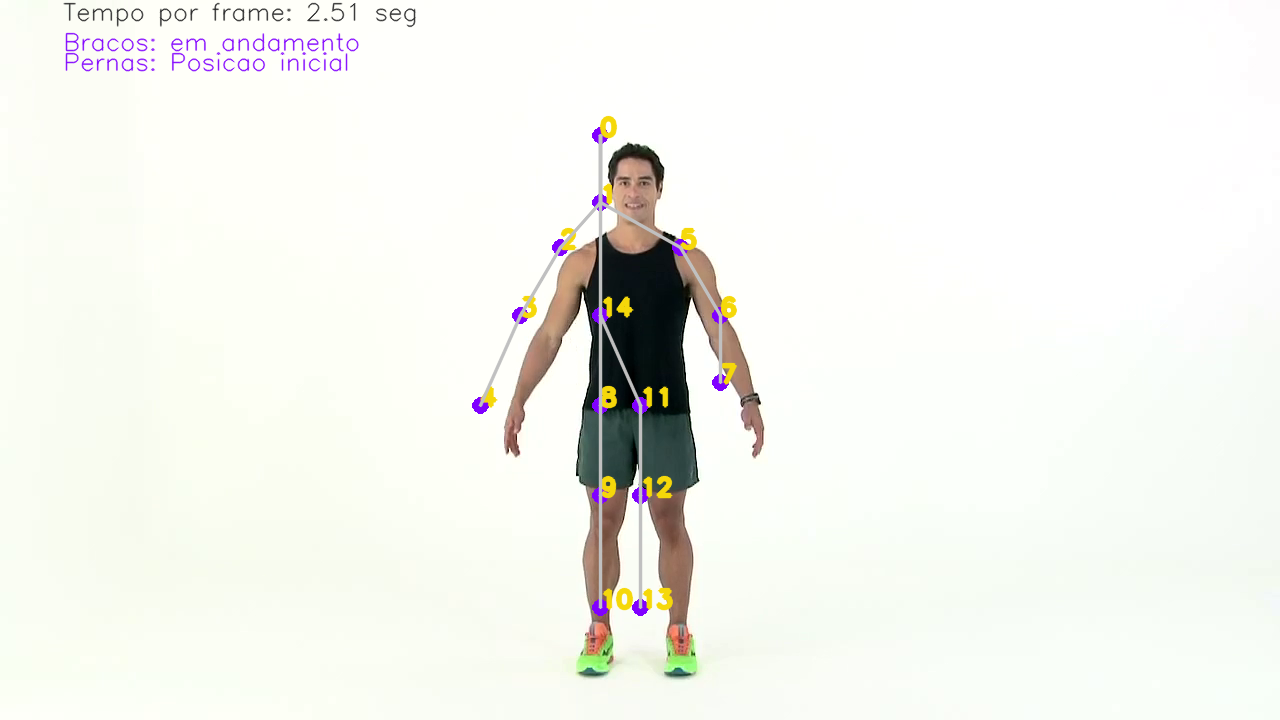

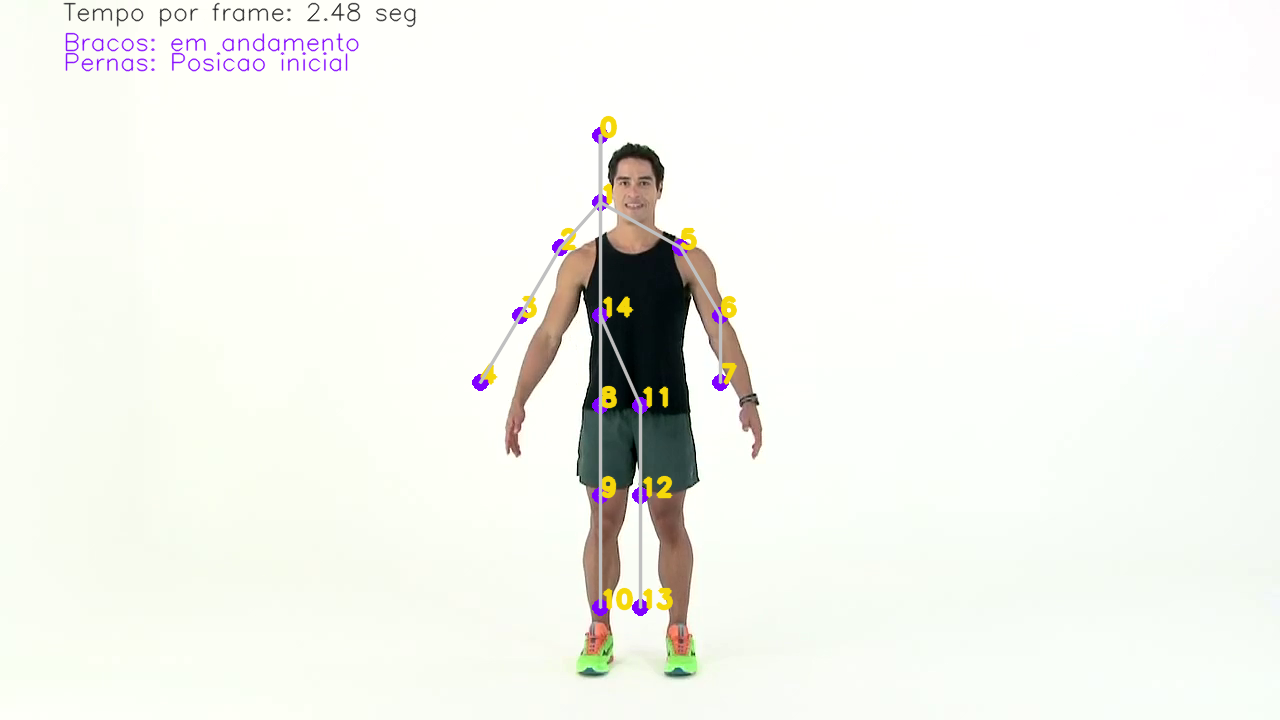

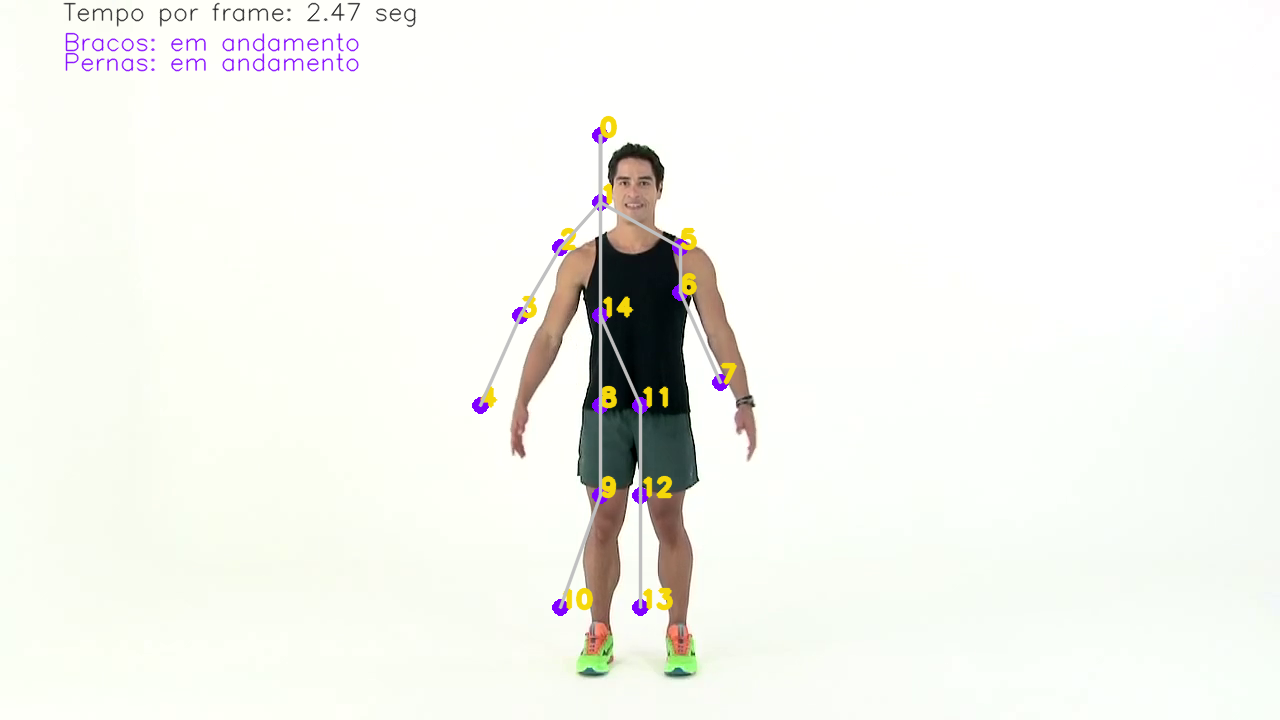

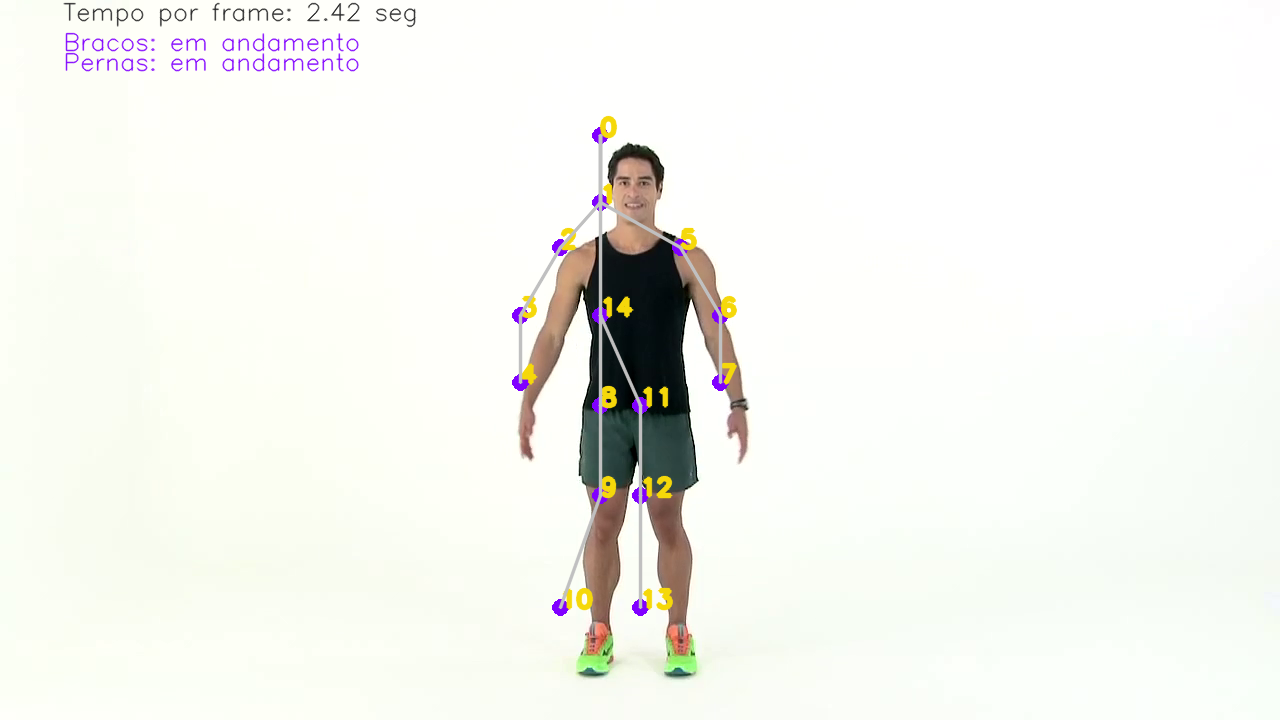

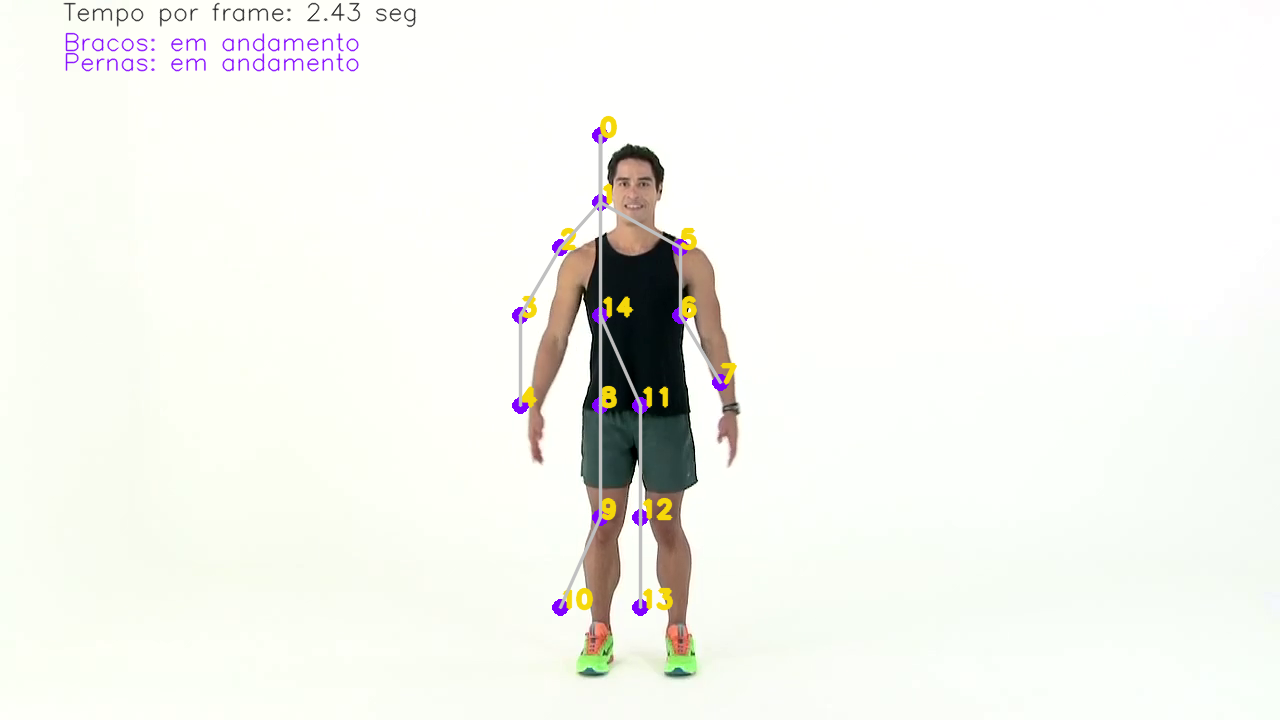

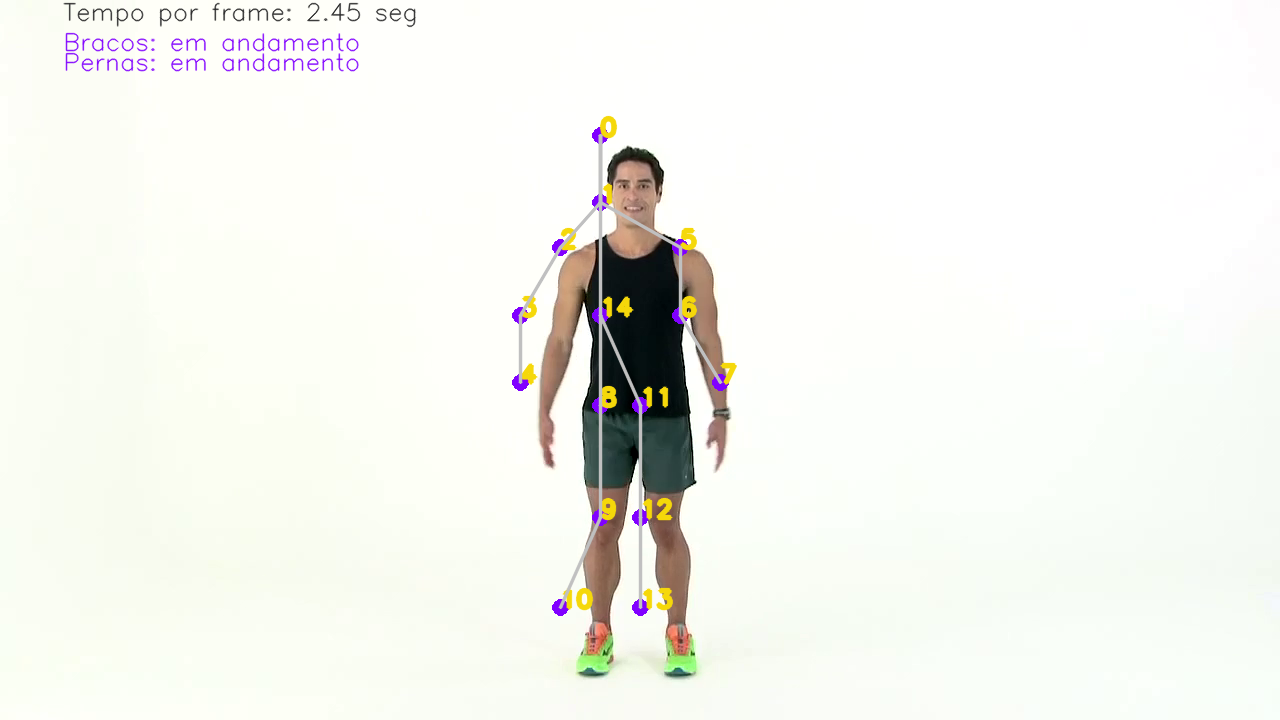

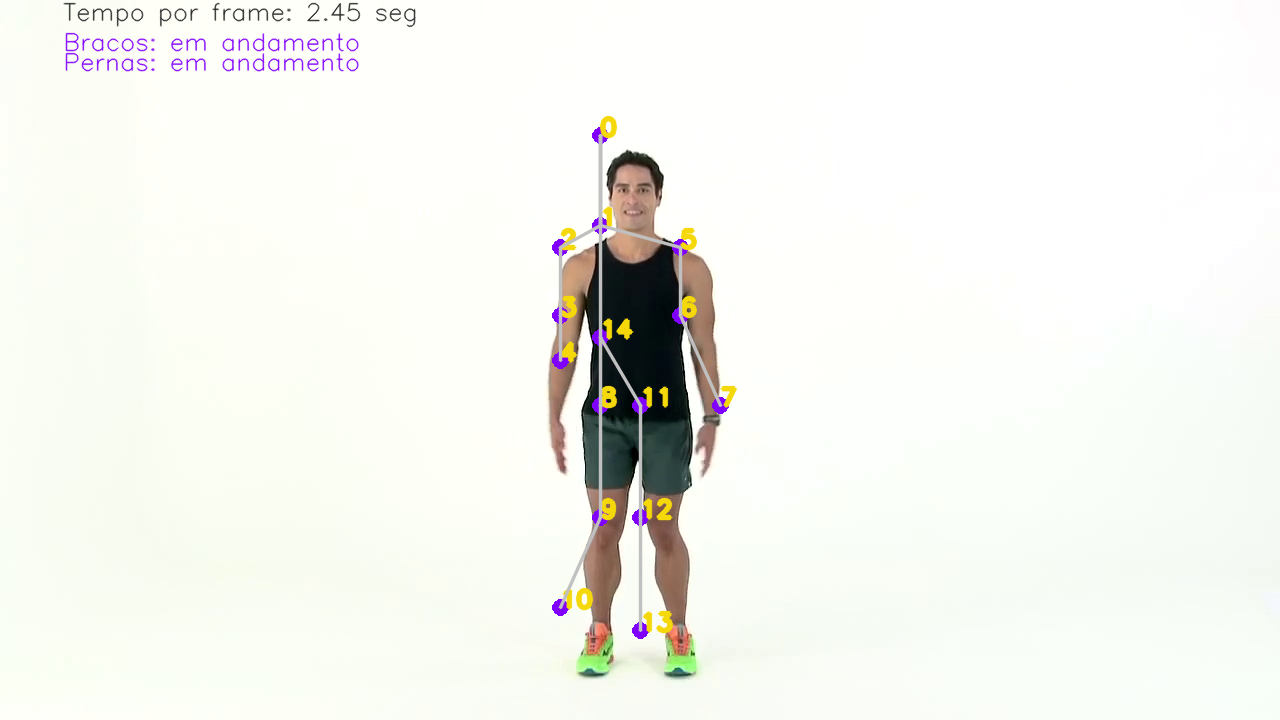

posicao inicial


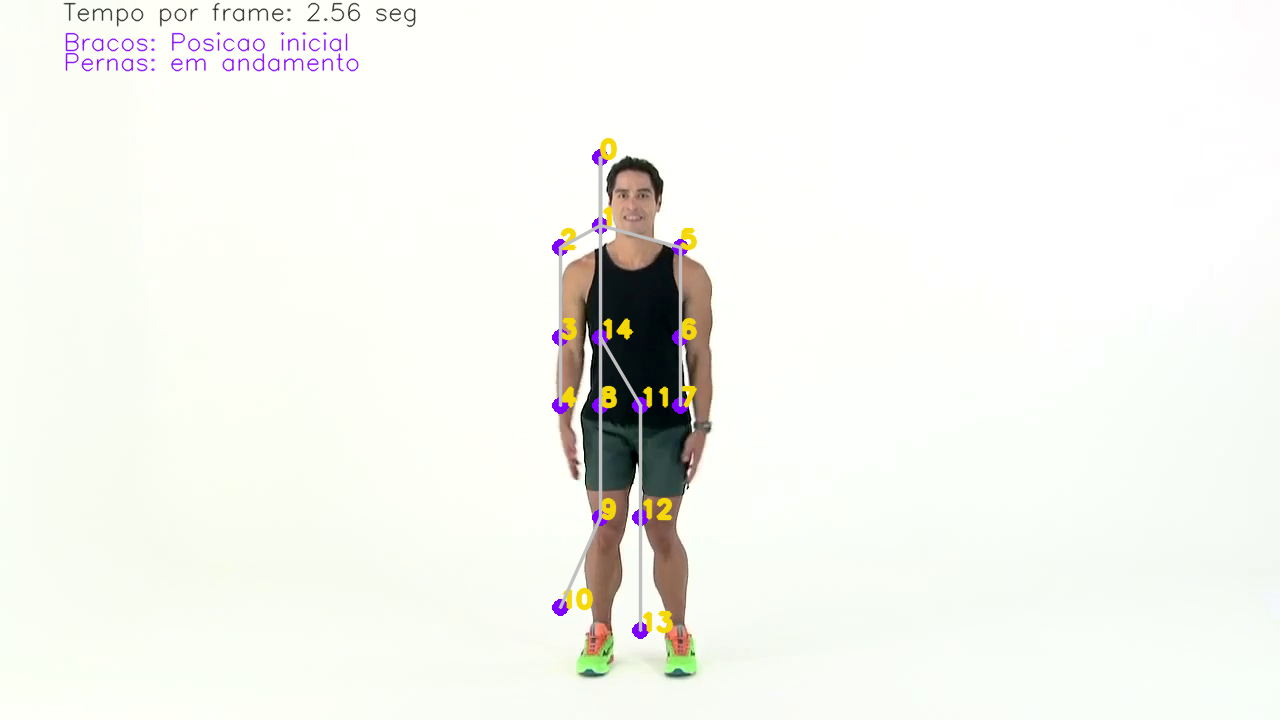

posicao inicial


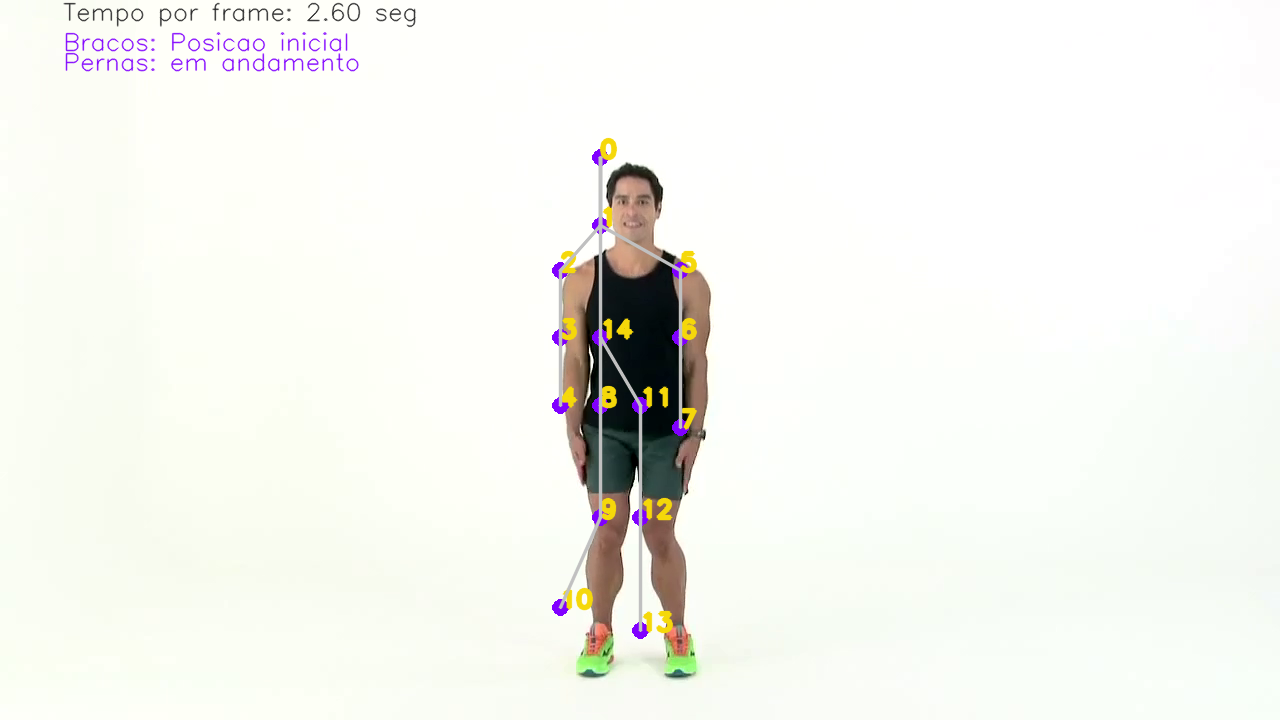

posicao inicial


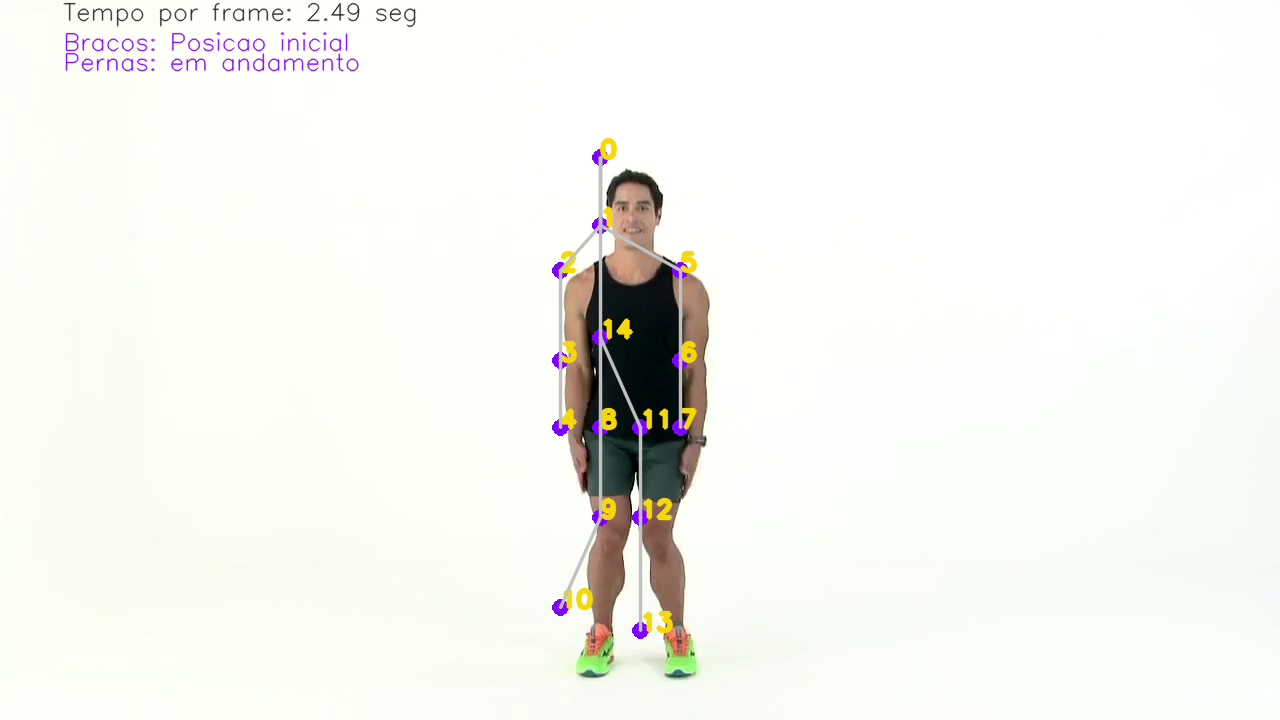

posicao inicial


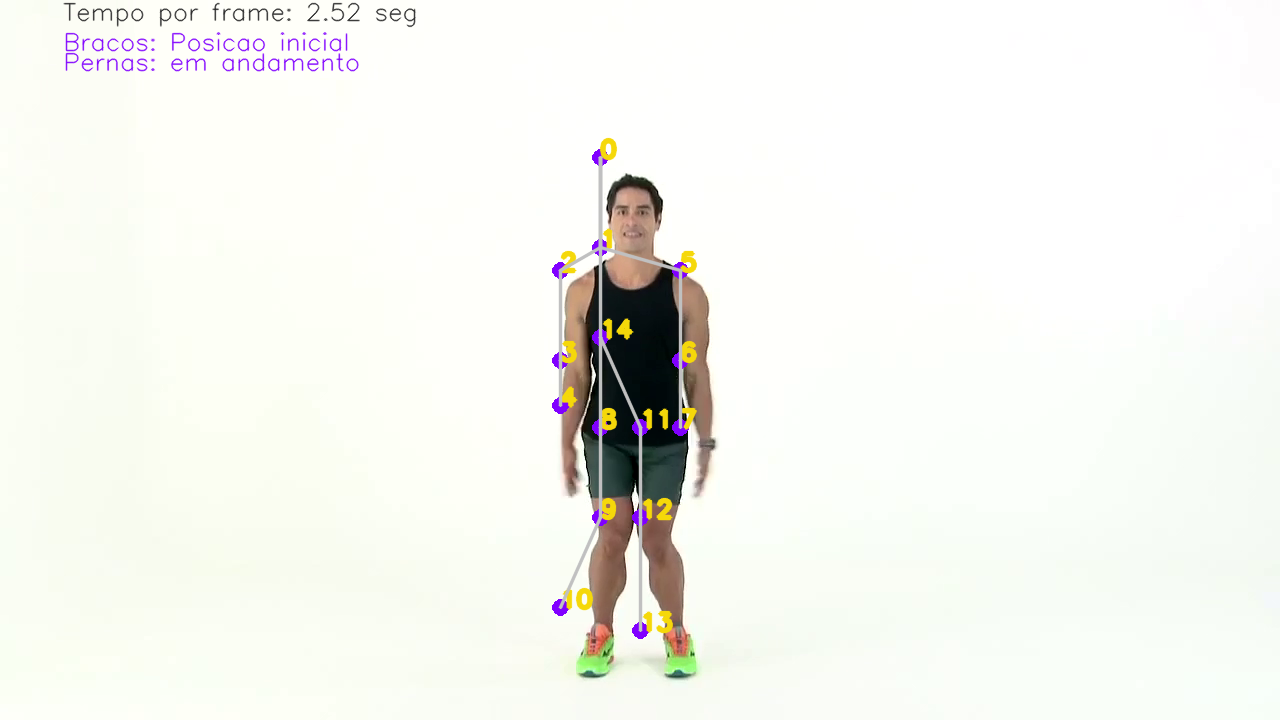

posicao inicial


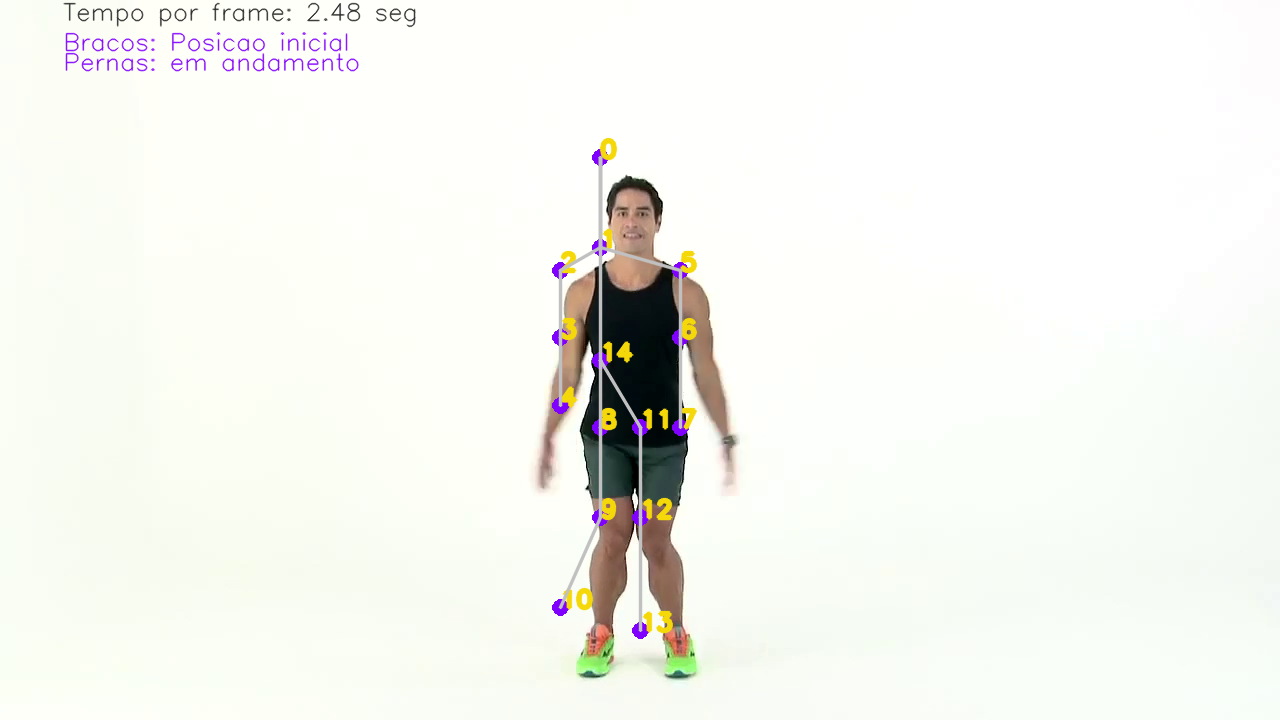

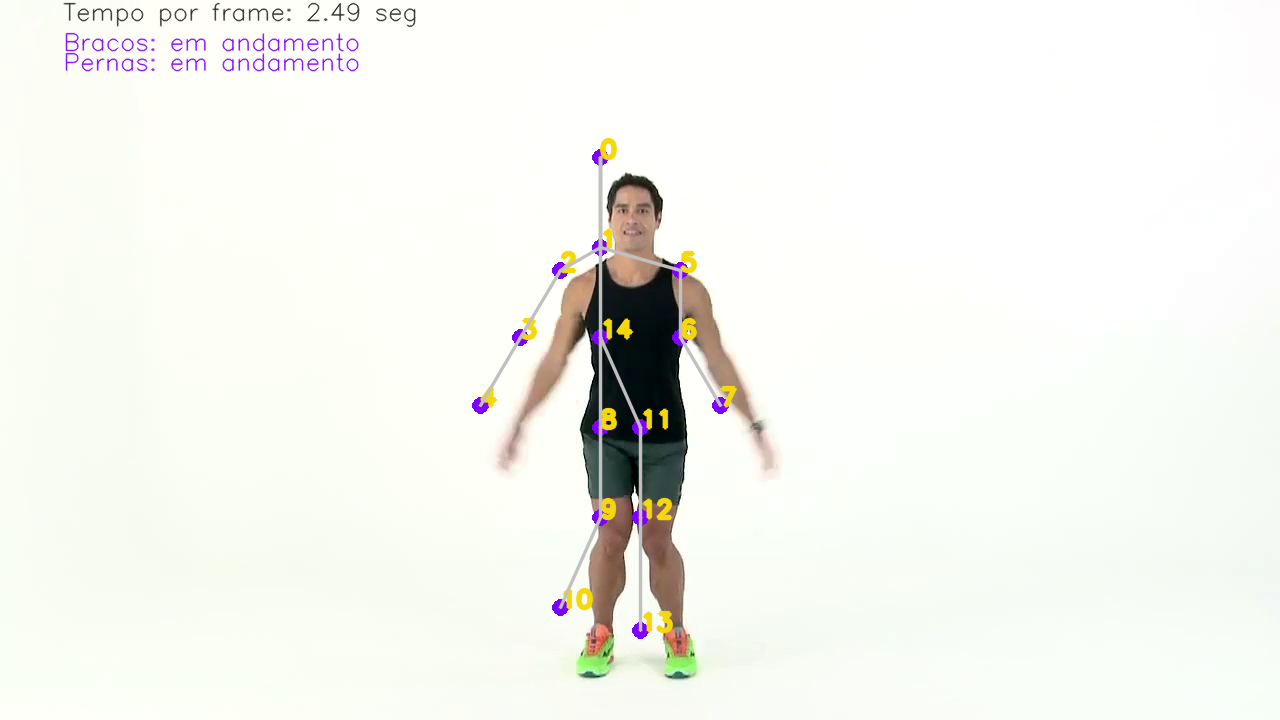

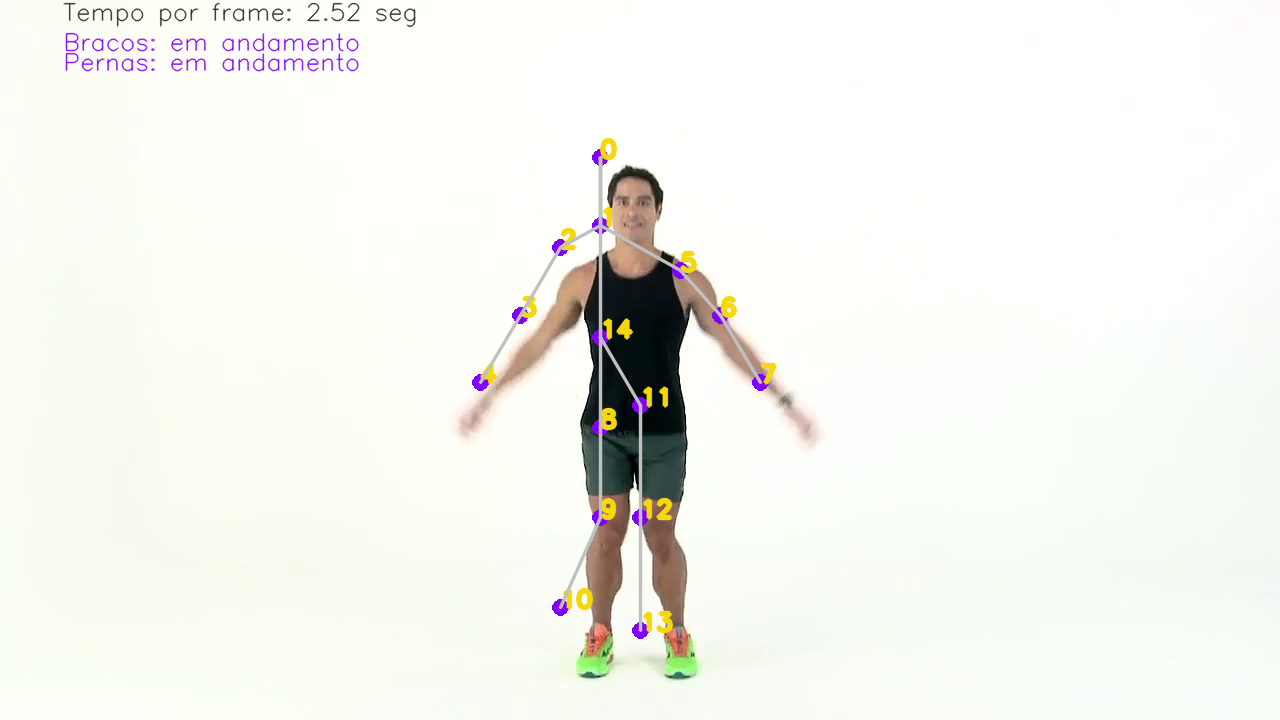

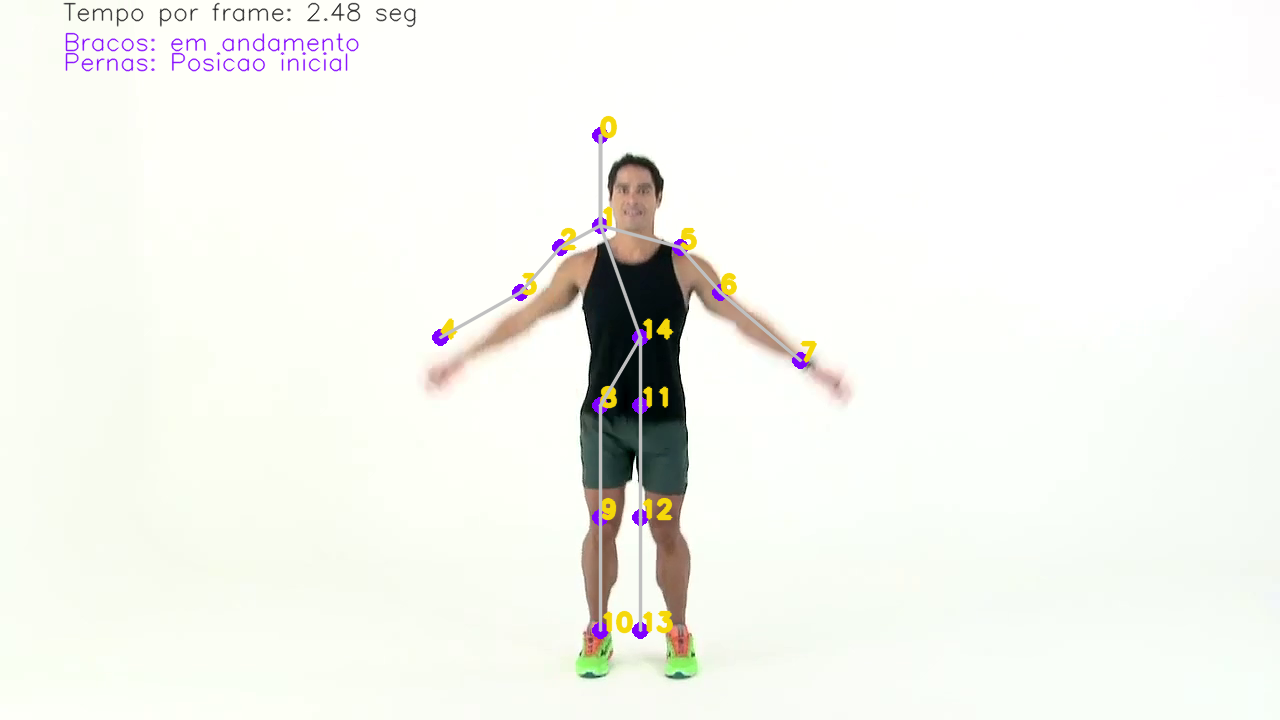

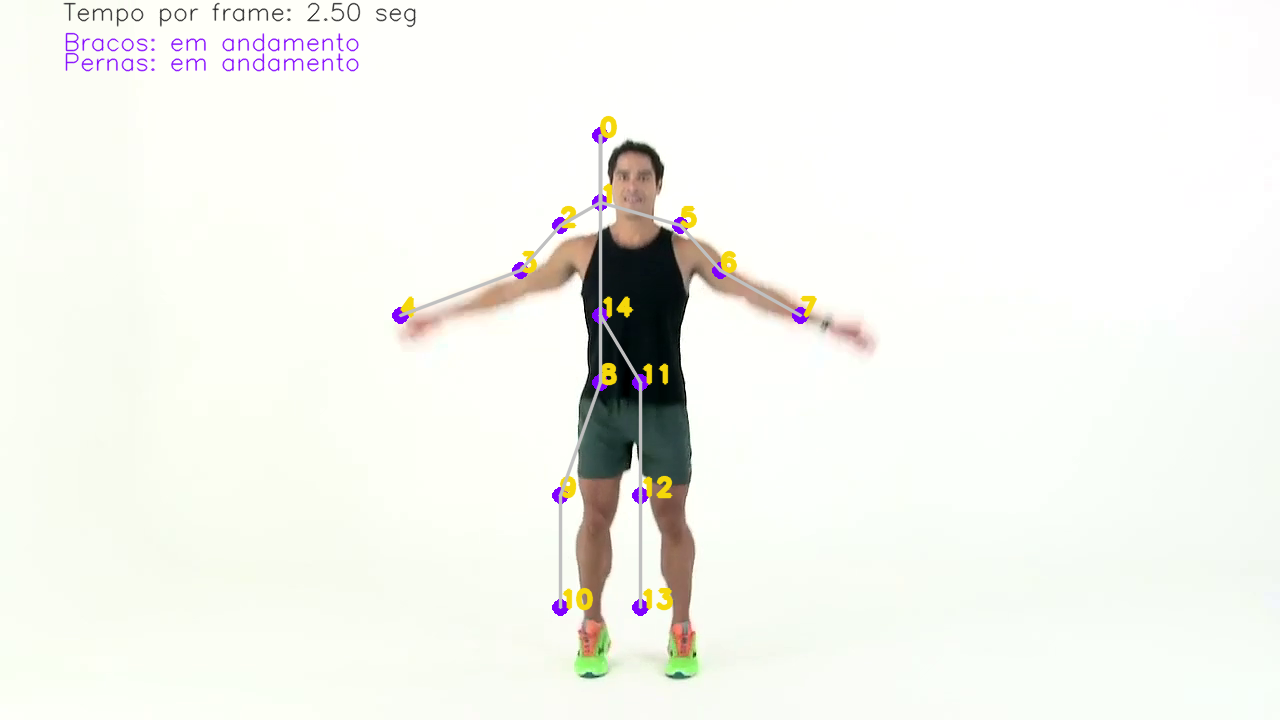

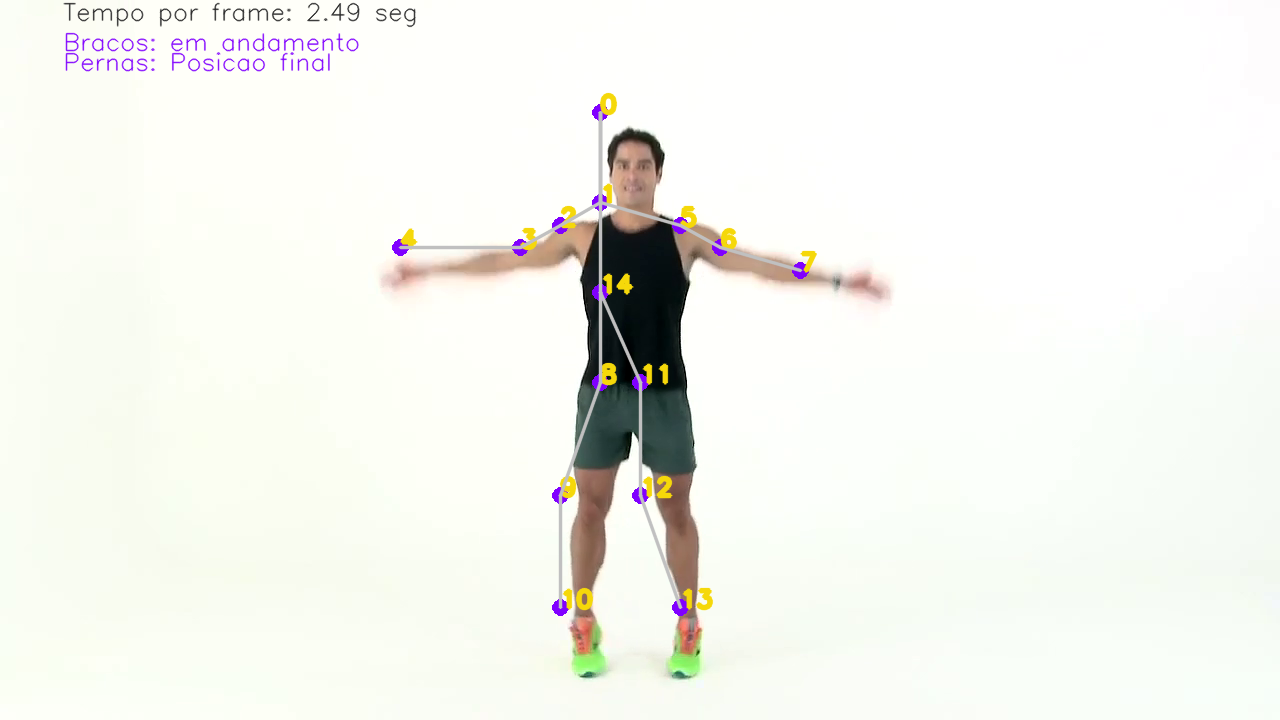

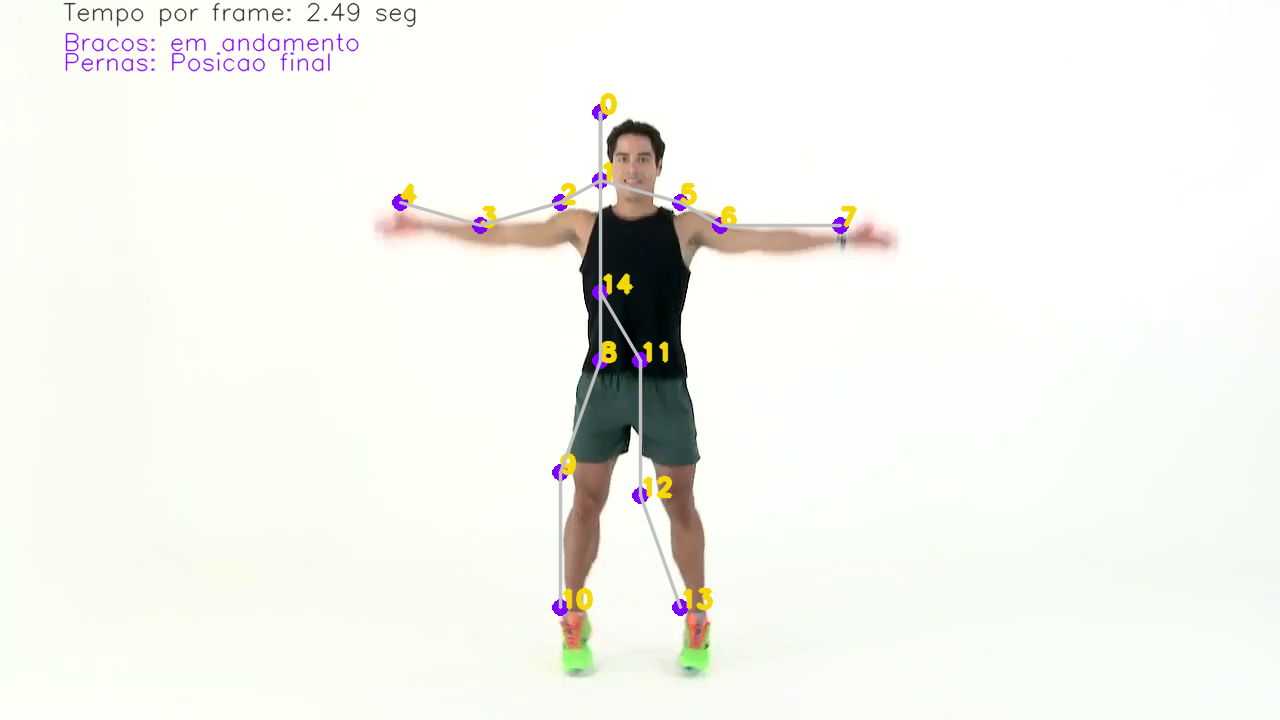

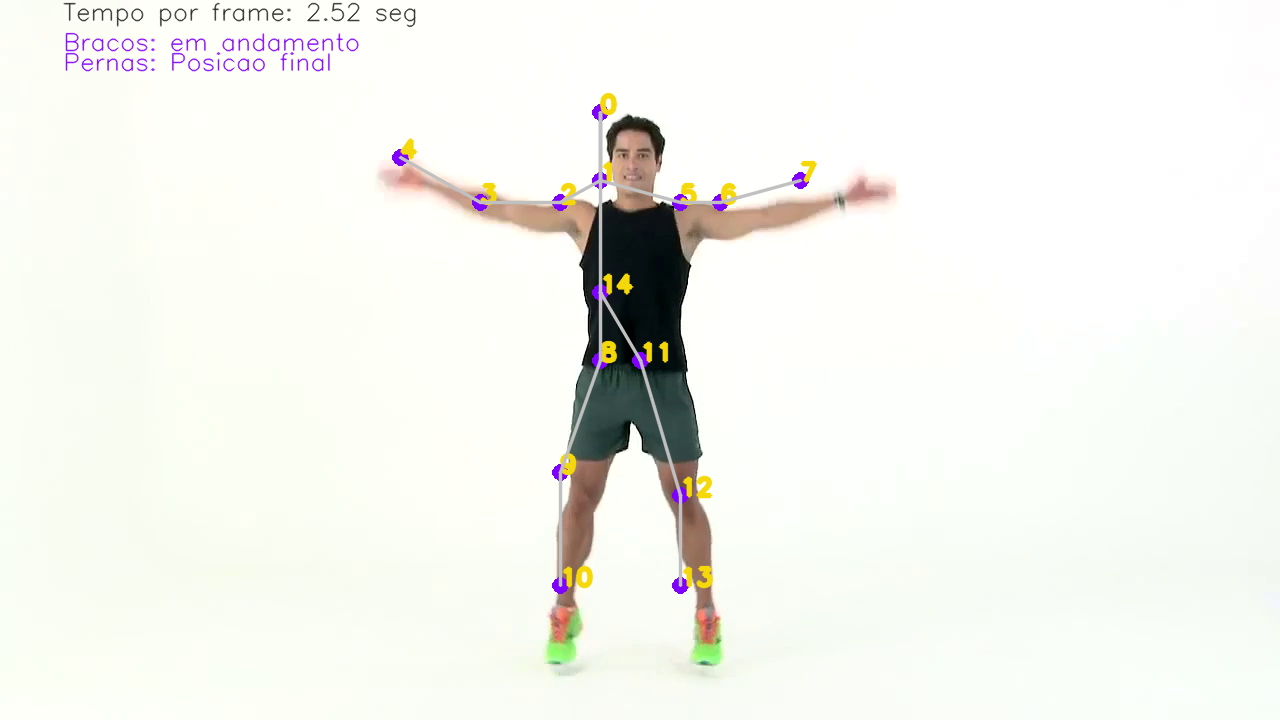

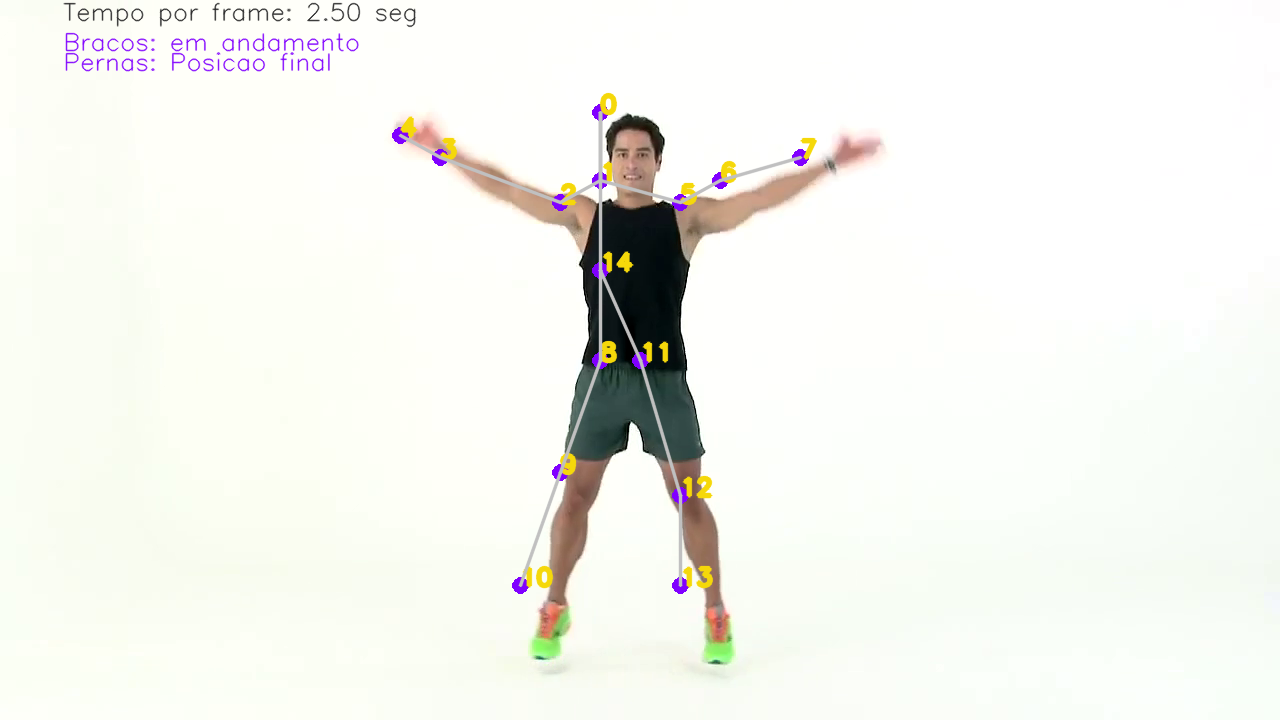

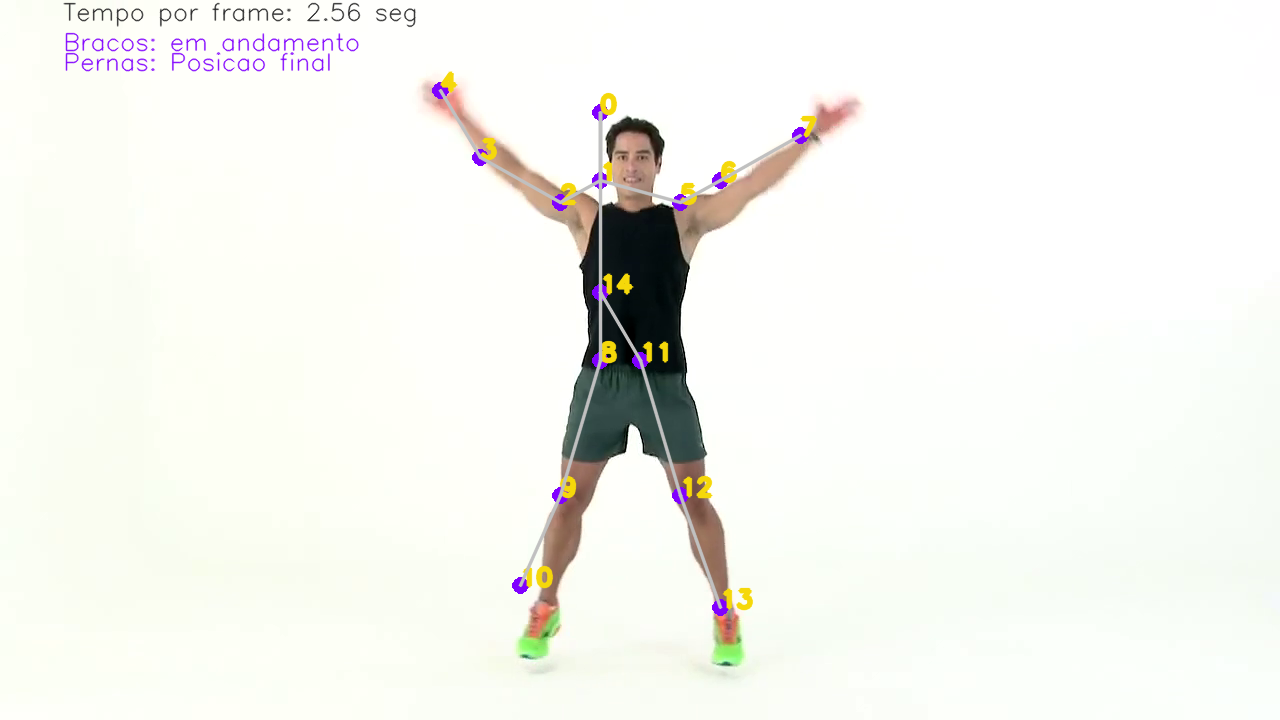

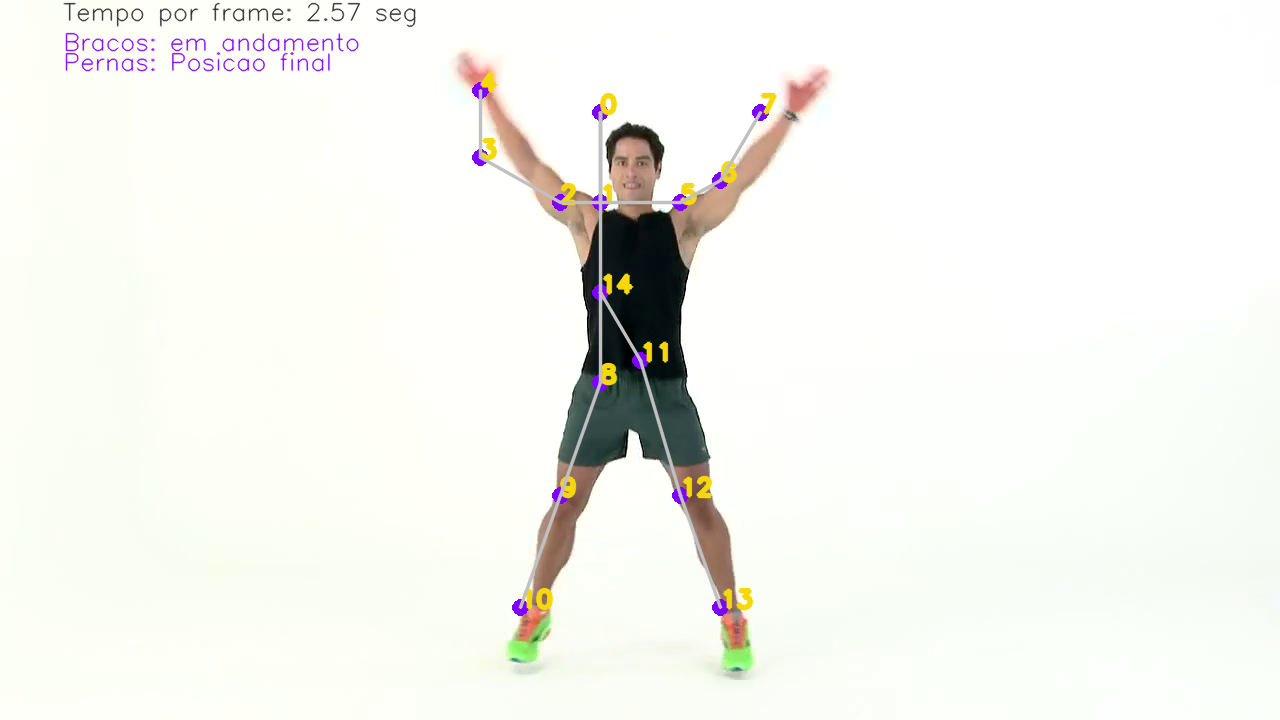

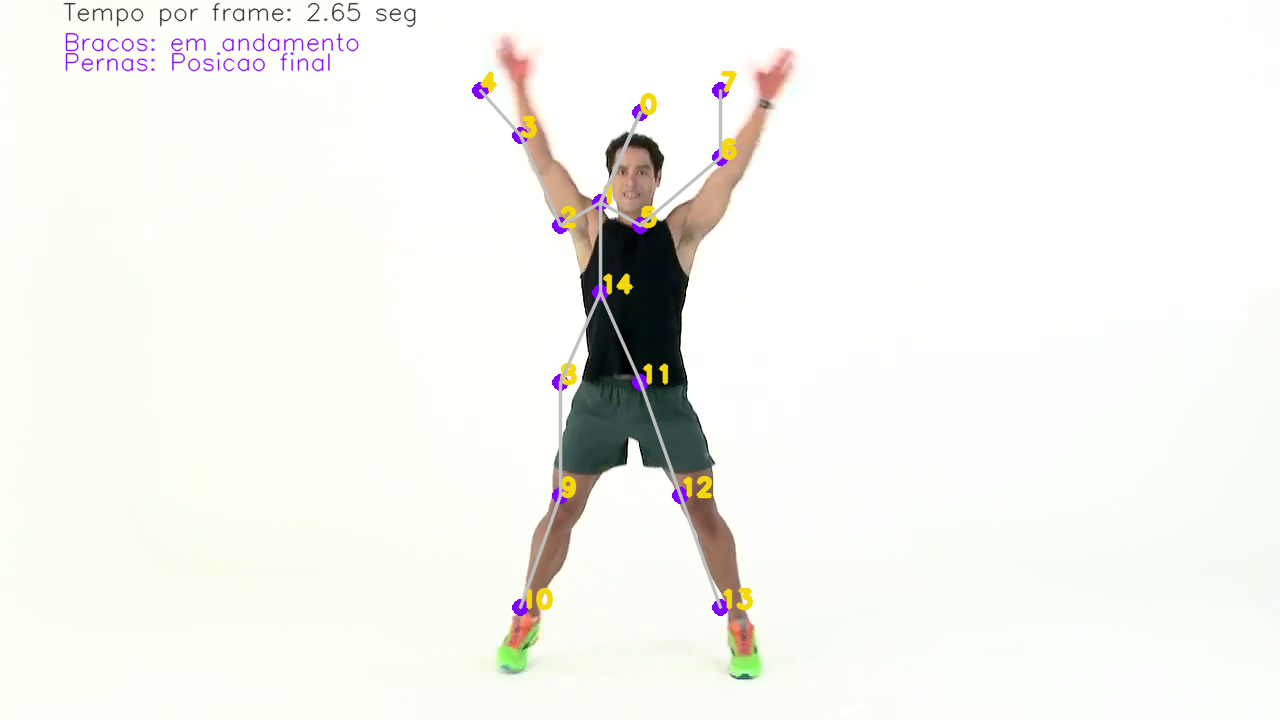

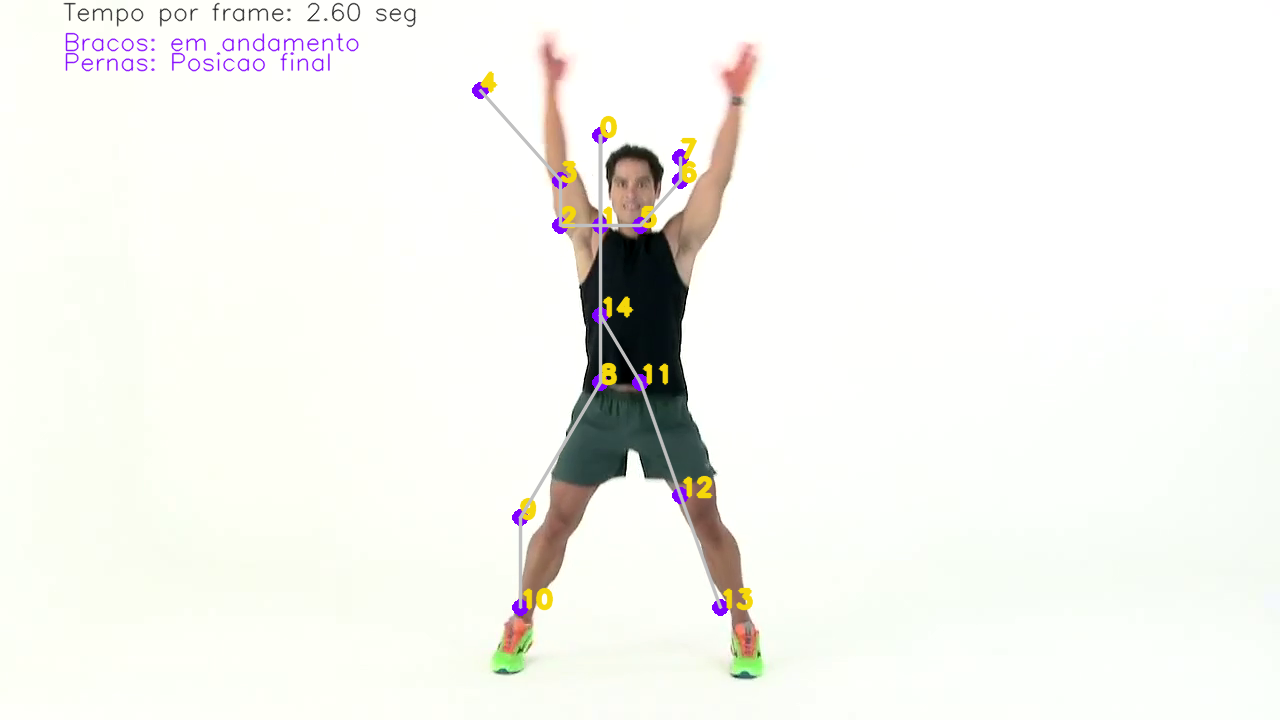

TypeError: ignored

In [0]:
limite = 0.1
while (cv2.waitKey(1) < 0):
  t = time.time()
  conectado, video = captura.read()
  
  video_copia = np.copy(video)
  
  if not conectado:
    cv2.waitKey()
    break
    
  video_largura = video.shape[1]
  video_altura = video.shape[0]
  
  # creating mask with black background
  tamanho = cv2.resize(video, (video_largura, video_altura))
  mapa_suave = cv2.GaussianBlur(tamanho, (3,3), 0, 0)
  fundo = np.uint8(mapa_suave > limite)
  
  #  image type conversion
  blob_entrada = cv2.dnn.blobFromImage(video, 1.0 / 255, 
                                    (entrada_largura, entrada_altura), 
                                    (0, 0, 0), swapRB = False, crop = False)
  
  modelo.setInput(blob_entrada)
  saida = modelo.forward()
  
  altura = saida.shape[2]
  largura = saida.shape[3]
  
  pontos = []
  for i in range(numero_pontos):
    mapa_confianca = saida[0, i, :, :]
    _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)
  
    x = (video_largura * ponto[0]) / largura
    y = (video_altura * ponto[1] / altura)
  
    if confianca > limite:
      cv2.circle(video_copia, (int(x), int(y)), 4, cor_pontoB, 
                 thickness = tamanho_circulo, 
                 lineType=cv2.FILLED)
      cv2.putText(video_copia, "{}".format(i), (int(x), int(y)), 
                fonte, tamanho_fonte, cor_txtponto, 3, 
                lineType=cv2.LINE_AA)
      cv2.putText(fundo, " ", (int(x), int(y)), 
                fonte, tamanho_fonte, cor_txtponto, 3, 
                lineType=cv2.LINE_AA)
      
      pontos.append((int(x), int(y)))
    else:
      pontos.append(0,0)
      
  # Desenho do esqueleto   
  for par in pares_pontos:
    parteA = par[0]
    parteB = par[1]
  
    if pontos[parteA] and pontos[parteB]:
      cv2.line(video, pontos[parteA], pontos[parteB], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
      cv2.line(video_copia, pontos[parteA], pontos[parteB], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
      cv2.line(fundo, pontos[parteA], pontos[parteB], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
      
      cv2.circle(video, pontos[parteA], 4, cor_pontoA, thickness = espessura,
              lineType = cv2.FILLED)
      cv2.circle(video, pontos[parteB], 4, cor_pontoA, thickness = espessura,
              lineType = cv2.FILLED)
      cv2.circle(fundo, pontos[parteA], 4, cor_pontoA, thickness = espessura,
              lineType = cv2.FILLED)
      cv2.circle(fundo, pontos[parteB], 4, cor_pontoA, thickness = espessura,
              lineType = cv2.FILLED)
      
  # Arms
  if extrator_CORPO.verificar_bracos_ABAIXO(pontos[0:8]) == True:
    # 25% of completed movement
    valida_bracos_abaixo = 0.25
    cv2.line(video_copia, pontos[0], pontos[1], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
    cv2.putText(video_copia, " Bracos: Posicao inicial", (50, 50), 
                fonte, tamanho_fonte, cor_txtinicial, 0, 
                lineType=cv2.LINE_AA)
  elif extrator_CORPO.verificar_bracos_ACIMA(pontos[0:8]) == True:
    #  50% of completed movement
    valida_bracos_acima = 0.5
    cv2.line(video_copia, pontos[0], pontos[1], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
    cv2.putText(video_copia, " Bracos: Posicao final", (50, 50), 
                fonte, tamanho_fonte, cor_txtinicial, 0, 
                lineType=cv2.LINE_AA)
  else:
    valida_bracos_abaixo = 0
    valida_bracos_acima = 0
    cv2.line(video_copia, pontos[0], pontos[1], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
    cv2.putText(video_copia, " Bracos: em andamento", (50, 50), 
                fonte, tamanho_fonte, cor_txtinicial, 0, 
                lineType=cv2.LINE_AA)
    
  # legs
  if extrator_CORPO.verificar_pernas_AFASTADAS(pontos[8:14]) == True:
    # 50% of completed movement 
    valida_pernas_afastadas = 0.5
    cv2.line(video_copia, pontos[0], pontos[1], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
    cv2.putText(video_copia, " Pernas: Posicao final", (50, 70), 
                fonte, tamanho_fonte, cor_txtinicial, 0, 
                lineType=cv2.LINE_AA)
    
  elif extrator_CORPO.verificar_pernas_JUNTAS(pontos[8:14]) == True:
    # 25% of completed movement 
    valida_pernas_juntas = 0.25  
    cv2.line(video_copia, pontos[0], pontos[1], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
    cv2.putText(video_copia, " Pernas: Posicao inicial", (50, 70), 
                fonte, tamanho_fonte, cor_txtinicial, 0, 
                lineType=cv2.LINE_AA)
  else:
    valida_pernas_afastadas = 0
    valida_pernas_juntas = 0
    cv2.line(video_copia, pontos[0], pontos[1], cor_linha,
               tamanho_linha, lineType = cv2.LINE_AA)
    cv2.putText(video_copia, " Pernas: em andamento", (50, 70), 
                fonte, tamanho_fonte, cor_txtinicial, 0, 
                lineType=cv2.LINE_AA)
  
  if valida_bracos_acima !=0 and valida_pernas_afastadas != 0:
    cv2.putText(video_copia, " Polichinelo válido: " + str(int(valida_bracos_acima + valida_pernas_afastadas)),
                (50, 200), fonte, tamanho_fonte, cor_txtinicial, 0, 
                lineType=cv2.LINE_AA)
 
  cv2.putText(video_copia, " Tempo por frame: {:.2f} seg".format(time.time() - t), 
                (50, 20), 
                fonte, tamanho_fonte, (40, 40, 40), 0, 
                lineType=cv2.LINE_AA)
              
  cv2_imshow(video_copia)
  #cv2_imshow(video)
  #cv2_imshow(fundo)
  gravar_video.write(video_copia)
gravar_video.release()